<a href="https://colab.research.google.com/github/Vaggelis-Arg/Amazon-Ecommerce-Analysis/blob/main/Amazon_Ecommerce_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Mining** (2024-2025)



## Overview

This project involves e-commerce analysis using the Amazon
Product Dataset. The project is divided into two parts: data
exploration & feature engineering, followed by machine learning
tasks including clustering, classification, recommendation system,
and sentiment analysis.

## **Team Information**

### Team member #1: **Vaggelis Argyropoulos**
* Github: [**Vaggelis-Arg**](https://github.com/Vaggelis-Arg)
* ID: sdi2200010
* Email: sdi2200010@di.uoa.gr
---
### Team member #2: **Christos Vladikas**
* Github: [**chrisvl11**](https://github.com/chrisvl11)
* ID: sdi2200020
* Email: sdi2200020@di.uoa.gr
---
### Team member #3: **Antonis Kalatzis**
* Github: [**tonykalantzis**](https://github.com/tonykalantzis) 
* ID: sdi2100046
* Email: sdi2100046@di.uoa.gr
---

## **Set up of the notebook**

### Downloads

In [1]:
!pip install nltk transformers torch contractions matplotlib seaborn wordcloud hf_xet scikit-learn
!pip install -U datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existing i

### Remove any leftover datasets from previous runs

In [2]:
!rm -f *.csv

### Imports

In [3]:
import warnings
warnings.filterwarnings("ignore")
import nltk
nltk.download(['punkt', 'stopwords', 'vader_lexicon', 'wordnet','omw-1.4', 'punkt_tab'])
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datasets import load_dataset
import pandas as pd
import re
import string
import random
import contractions
from nltk.corpus import stopwords
from datasets import load_dataset
from matplotlib.gridspec import GridSpec
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from transformers import pipeline, get_scheduler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.sparse import hstack
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from collections import defaultdict, Counter
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_validate
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import KeyedVectors
from scipy import spatial
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.naive_bayes import MultinomialNB, GaussianNB, ComplementNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import torch
from torch.optim import AdamW
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from sklearn.dummy import DummyClassifier

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
2025-06-21 17:51:49.150789: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750528309.345266      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: A

## **Part 1 - Pre-processing**

### **Task 1: Data Exploration and Feature Engineering**

#### **Dataset Preparation**



---
**Question**: 

*Extract data for any five categories that you like (e.g., Electronics, Books, Home & Kitchen). Visit the dataset link and download only the JSON files for the categories that you plan to use. Parse the JSON files and create the csv file(s) that you are going to use for the rest of the Tasks (For the 5 product categories selected by each student, create 5 different CSV files.). The dataset is quite large, even for the 5 categories. Start with a smaller subset by limiting the numbers of rows downloaded per category, making sure your code works, before getting more rows for the analysis part of this project. Clean the data by handling missing values, normalizing prices, and preprocessing text (more on the text preprocessing techniques in Part2).*

---

**Answer:**

We used the `datasets` library from Hugging Face with `streaming=True` to load and process review data efficiently for five selected Amazon product categories:

- **Books**
- **All_Beauty**
- **Electronics**
- **Movies_and_TV**
- **Sports_and_Outdoors**

For each category:
- Up to **120,000 rows** were streamed and converted to Pandas DataFrames.
- Reviews and metadata were saved separately into two CSV files:
  - `{category}_reviews.csv`
  - `{category}_metadata.csv`

This design ensured modular preprocessing and low memory usage.

**Selected Fields:**

- **Review Columns:**  
    | rating | title | text | parent_asin | asin | user_id | timestamp | helpful_vote | verified_purchase |
    |--------|-------|------|-------------|------|---------|-----------|---------------|--------------------|
    | ⭐ 1–5 | Review title | Review body text | Product group ID | Product ID | Reviewer ID | Date (UNIX) | Upvotes | True/False |

<br>

- **Metadata Columns:**  
    | parent_asin | main_category | title | average_rating | rating_number | description | price | categories | bought_together | store |
    |-------------|----------------|-------|-----------------|----------------|-------------|-------|------------|------------------|-------|
    | Product group ID | Top-level category | Product name | Avg. rating across reviews | Total number of ratings | Product description | Price (float/string) | Category hierarchy | Commonly co-purchased items | Seller/store name |

**Notes:**

This pipeline minimizes manual intervention and download overhead, making it **scalable** to other categories. Streaming also enabled fast iteration and ensured that only relevant fields were retained for downstream tasks like clustering, classification, and recommendation.

---


In [4]:
# Configs: (category_name, review_config, meta_config)
datasets_info = [
    ("Books", "raw_review_Books", "raw_meta_Books"),
    ("All_Beauty", "raw_review_All_Beauty", "raw_meta_All_Beauty"),
    ("Electronics", "raw_review_Electronics", "raw_meta_Electronics"),
    ("Movies_and_TV", "raw_review_Movies_and_TV", "raw_meta_Movies_and_TV"),
    ("Sports_and_Outdoors", "raw_review_Sports_and_Outdoors", "raw_meta_Sports_and_Outdoors"),
]

# Select correct columns
review_columns = [
    "rating", "title", "text", "parent_asin", "asin" , "user_id", "timestamp",
    "helpful_vote", "verified_purchase"
]
meta_columns = [
    "parent_asin", "main_category", "title", "average_rating", "rating_number",
    "description", "price", "categories", "bought_together", "store"
]

for category, review_config, metadata_config in datasets_info:
    print(f"Loading: {category}")

    # Load streaming datasets with limited columns
    reviews_iter = load_dataset(
        "McAuley-Lab/Amazon-Reviews-2023",
        review_config,
        split="full",
        streaming=True,
        trust_remote_code=True
    ).select_columns(review_columns)

    metadata_iter = load_dataset(
        "McAuley-Lab/Amazon-Reviews-2023",
        metadata_config,
        split="full",
        streaming=True,
        trust_remote_code=True
    ).select_columns(meta_columns)

    # Convert to pandas and save
    reviews_df = pd.DataFrame(reviews_iter.take(120_000))
    metadata_df = pd.DataFrame(metadata_iter.take(120_000))

    reviews_df.to_csv(f"{category}_reviews.csv", index=False)
    metadata_df.to_csv(f"{category}_metadata.csv", index=False)

    print(f"Saved selected columns for {category}")


Loading: Books


README.md:   0%|          | 0.00/30.3k [00:00<?, ?B/s]

Amazon-Reviews-2023.py:   0%|          | 0.00/39.6k [00:00<?, ?B/s]

Saved selected columns for Books
Loading: All_Beauty
Saved selected columns for All_Beauty
Loading: Electronics
Saved selected columns for Electronics
Loading: Movies_and_TV
Saved selected columns for Movies_and_TV
Loading: Sports_and_Outdoors
Saved selected columns for Sports_and_Outdoors


#### Text and Metadata Preprocessing

To prepare the dataset for downstream tasks like sentiment analysis and recommendation, we implemented a comprehensive text and metadata cleaning pipeline.

The key steps include:

- **Downloading required NLTK resources**, such as tokenizers, stopwords, and sentiment lexicons.
- **Expanding contractions** (e.g., "don't" → "do not").
- **Replacing special tokens**:
  - URLs → `link`
  - Mentions/hashtags → `tag`
  - Emails → `mail`
  - Numbers → `number`
- **Handling emoticons** using a predefined dictionary that maps symbols (e.g., `:)`, `:(`) to words like `"happy"` or `"sad"`.
- **Text normalization**:
  - Lowercasing
  - Removing punctuation
  - Reducing excessive character repetitions
  - Lemmatizing tokens and removing stopwords

Metadata titles and descriptions were also cleaned using the same function. For price data, numeric values were coerced and rows with missing prices were removed.

After merging the cleaned reviews and metadata using `parent_asin`, the final output was saved in `{category}_cleaned.csv` for each product category.

This preprocessing ensures that text input is consistent and structured for all subsequent analysis and machine learning steps.

---

In [5]:
# Emoticon dictionary for replacements
emoticons = {
    ":)": "happy", ":D": "very happy", ":-)": "happy", "(:": "happy",
    ";)": "winking", ";-)": "winking", "(:": "happy", "^^": "happy",
    ":(": "sad", ":-(": "sad", "):": "sad",
    ":o": "surprised", ":-o": "surprised", ":O": "shocked",
    ":'(": "crying", ":-'(": "crying",
    ":P": "playful", ":-P": "playful", ";P": "cheeky", ";-P": "cheeky",
    "<3": "love", "</3": "heartbroken"
}

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def normalize_price(price, min_price, max_price):
    return (price - min_price) / (max_price - min_price) if max_price != min_price else 0

# Preprocessing function
def preprocess_text(text):
    if pd.isna(text):
        return ""

    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", 'link', text)  # replace URLs
    text = re.sub(r"\@\w+|\#\w+", 'tag', text)  # replace mentions and hashtags
    text = re.sub(r"\S+@\S+", 'mail', text)  # replace emails
    text = re.sub(r'\d+', 'number', text) # replace numbers
    text = contractions.fix(text)  # expand contractions

    # Replace emoticons
    for emoticon, word in emoticons.items():
        text = text.replace(emoticon, word)

    text = re.sub(r"[" + string.punctuation + "]", '', text)  # remove punctuation
    text = re.sub(r"(.)\1{2,}", r"\1\1", text)  # reduce 3+ char repeats to 2
    
    # Tokenize and Lemmatize
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    text = ' '.join(tokens)
    return text

# Load and clean each dataset
for category, *_ in datasets_info:
    print(f"Preprocessing: {category}")
    reviews = pd.read_csv(f"{category}_reviews.csv")
    metadata = pd.read_csv(f"{category}_metadata.csv")

    reviews = reviews.dropna(subset=["rating", "text", "parent_asin"])

    # preprocess text fields
    reviews["cleaned_title"] = reviews["title"].apply(preprocess_text)
    reviews["cleaned_text"] = reviews["text"].apply(preprocess_text)
    reviews["timestamp"] = pd.to_datetime(reviews["timestamp"], unit="ms")

    metadata["cleaned_title_meta"] = metadata["title"].apply(preprocess_text)
    metadata["cleaned_description"] = metadata["description"].apply(preprocess_text)

    df = pd.merge(reviews, metadata, on="parent_asin", how="left", suffixes=("", "_meta"))

    # normalize price
    if 'price' in df.columns:
        df['price'] = pd.to_numeric(df['price'], errors='coerce')

        # Remove any rows where price is NaN
        df = df.dropna(subset=['price'])

        min_price = df['price'].min()
        max_price = df['price'].max()
        df['normalized_price'] = df['price'].apply(lambda x: normalize_price(x, min_price, max_price))

    df.to_csv(f"{category}_cleaned.csv", index=False)
    print(f"Saved cleaned data to {category}_cleaned.csv")

print(reviews.head())

Preprocessing: Books
Saved cleaned data to Books_cleaned.csv
Preprocessing: All_Beauty
Saved cleaned data to All_Beauty_cleaned.csv
Preprocessing: Electronics
Saved cleaned data to Electronics_cleaned.csv
Preprocessing: Movies_and_TV
Saved cleaned data to Movies_and_TV_cleaned.csv
Preprocessing: Sports_and_Outdoors
Saved cleaned data to Sports_and_Outdoors_cleaned.csv
   rating               title  \
0     5.0        Crazy comfy!   
1     5.0          Excellent!   
2     5.0    Best saddle pads   
3     5.0  Perfect repair kit   
4     5.0         Works great   

                                                text parent_asin        asin  \
0  Not gonna lie- they are not much to look at. L...  B0BGFR76CF  B07F3BDT8T   
1                                 I love it. Pretty!  B00NXQLFQQ  B00NXQLFQQ   
2  Huge fan of B Vertigo and this dressage pad do...  B0957WLR63  B08SVPR266   
3  I have a great Weaver halter. Recently, the Ch...  B00IET8S80  B00IET8S80   
4  This was great for a slight

#### **Ratings and Reviews**

---

**Question**:

*Visualize using Matplotlib, Seaborn, or Plotly. You can use histograms, box plots, scatter plots, bar charts, word clouds, etc.:*

- *What is the distribution of product ratings within each of the 5 selected categories? Are there any categories with significantly higher or lower average ratings?*
- *Identify products with a high number of reviews but low ratings. What are some common keywords or phrases in the reviews for these products?*
- *For each of the 5 selected categories, identify the top 5 best-selling (highest review count) products. What are their key attributes (features)?*
- *How have average product ratings evolved over time within each category? Create line plots to show the average rating “trend” for each category over months or years. Are there any noticeable patterns or seasonal variations?*

---

**Answer**:

We performed exploratory data analysis (EDA) on the cleaned review data for all selected categories. Each visualization offers insight into customer behavior and product reception.

##### 1. Rating Distribution

A histogram was plotted to show the distribution of star ratings (1–5) for each product category. This helps identify skewness toward high or low ratings.

##### 2. Low-Rated Popular Products $\xrightarrow{}{}$ Word Cloud

We isolated products with average ratings below 3 and a sufficient number of reviews, then generated a word cloud from their review texts. This visualization reveals the most frequent terms associated with customer dissatisfaction.

##### 3. Rating Trends Over Time

By computing the average monthly rating, we visualized rating trends as line plots over time. These help highlight seasonality, shifts in perception, or long-term product performance changes.

##### 4. Top 5 Best-Selling Products

We identified and listed the top 5 most-reviewed products in each category. The analysis includes:
- Product Title
- ASIN
- Store (if available)
- Average Rating
- Total Number of Reviews

Each category visualization includes these components in a single subplot layout, making it easy to interpret multiple data views simultaneously.

---

Visualizing: Books


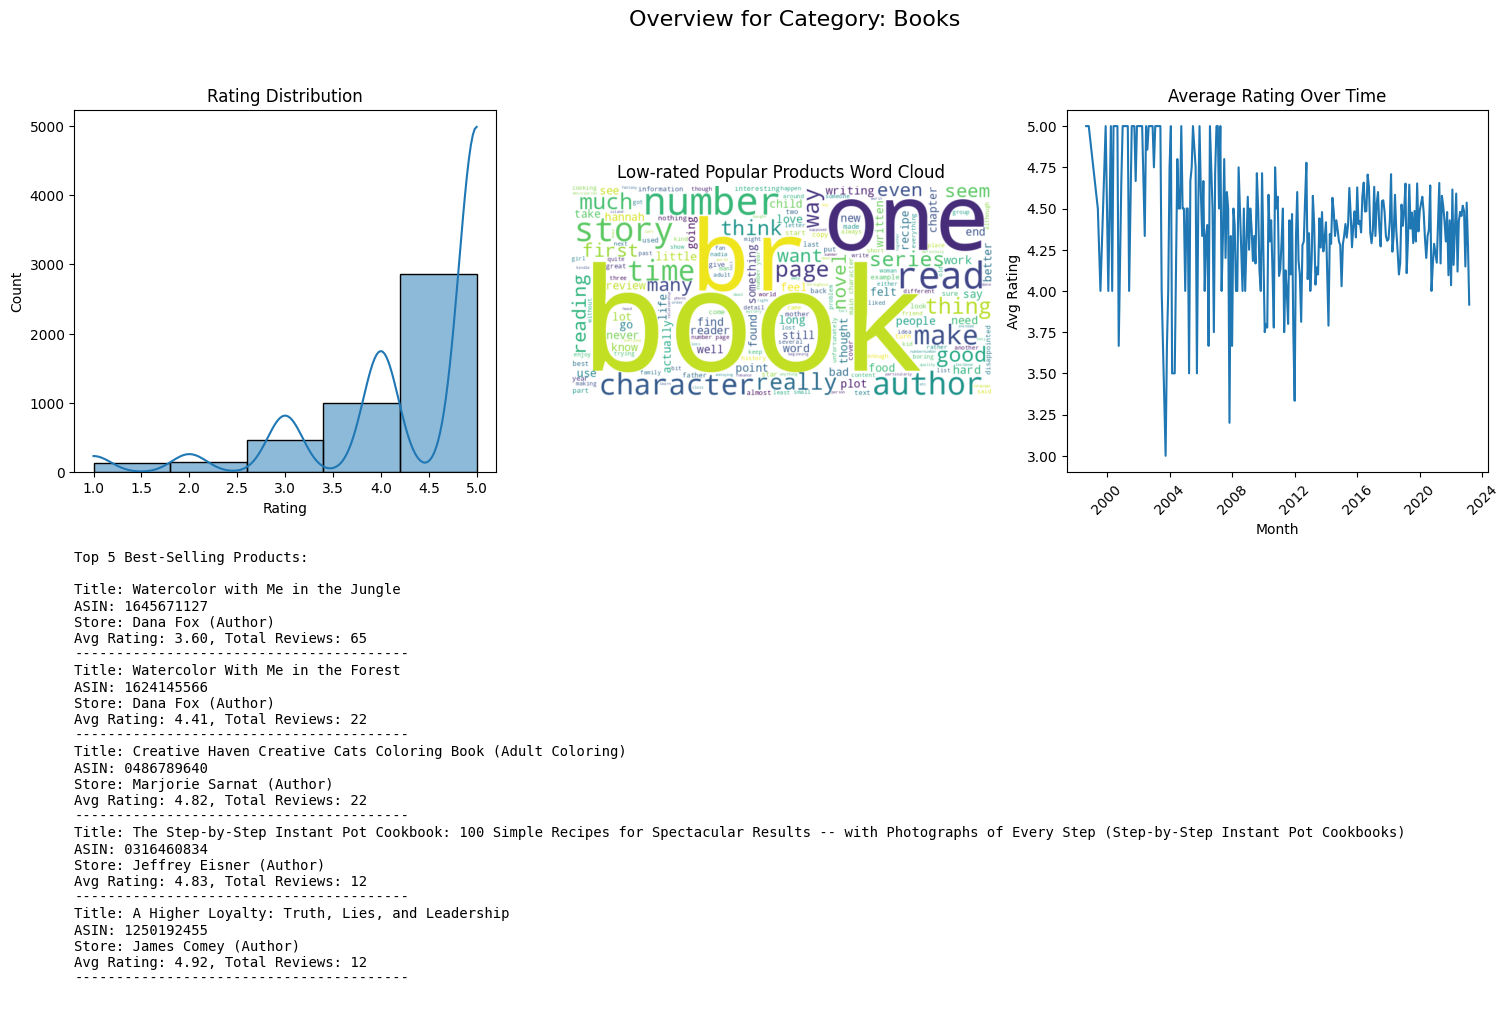

Visualizing: All_Beauty


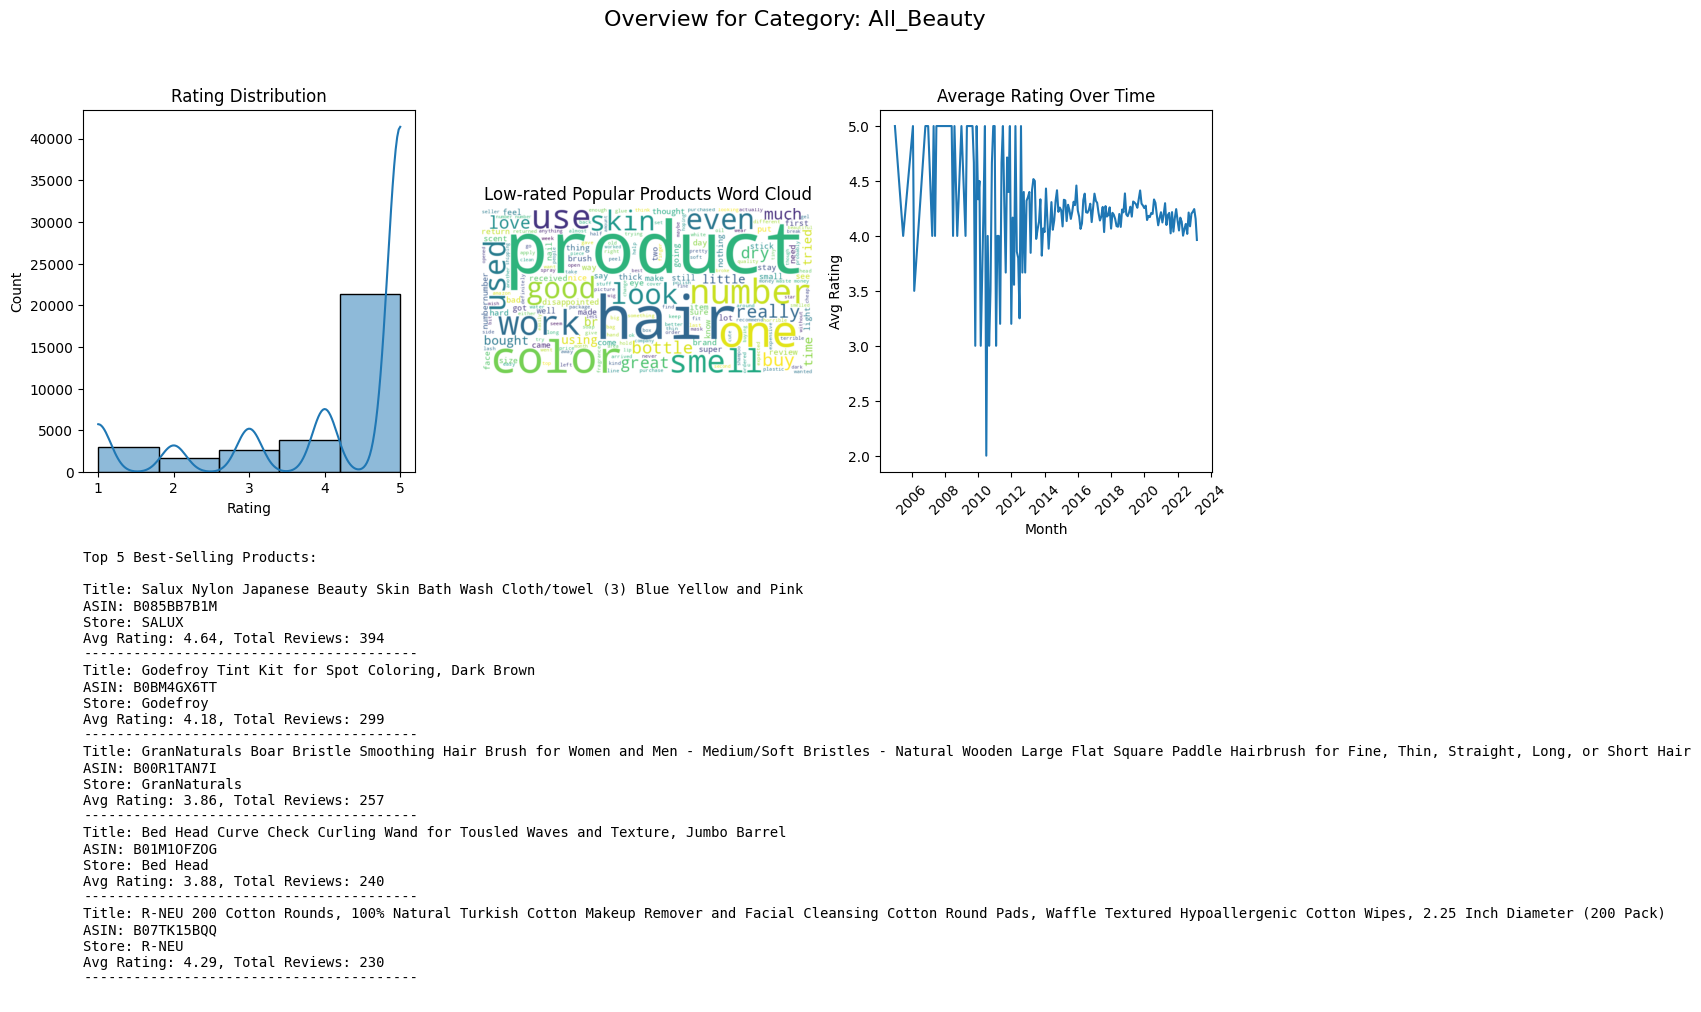

Visualizing: Electronics


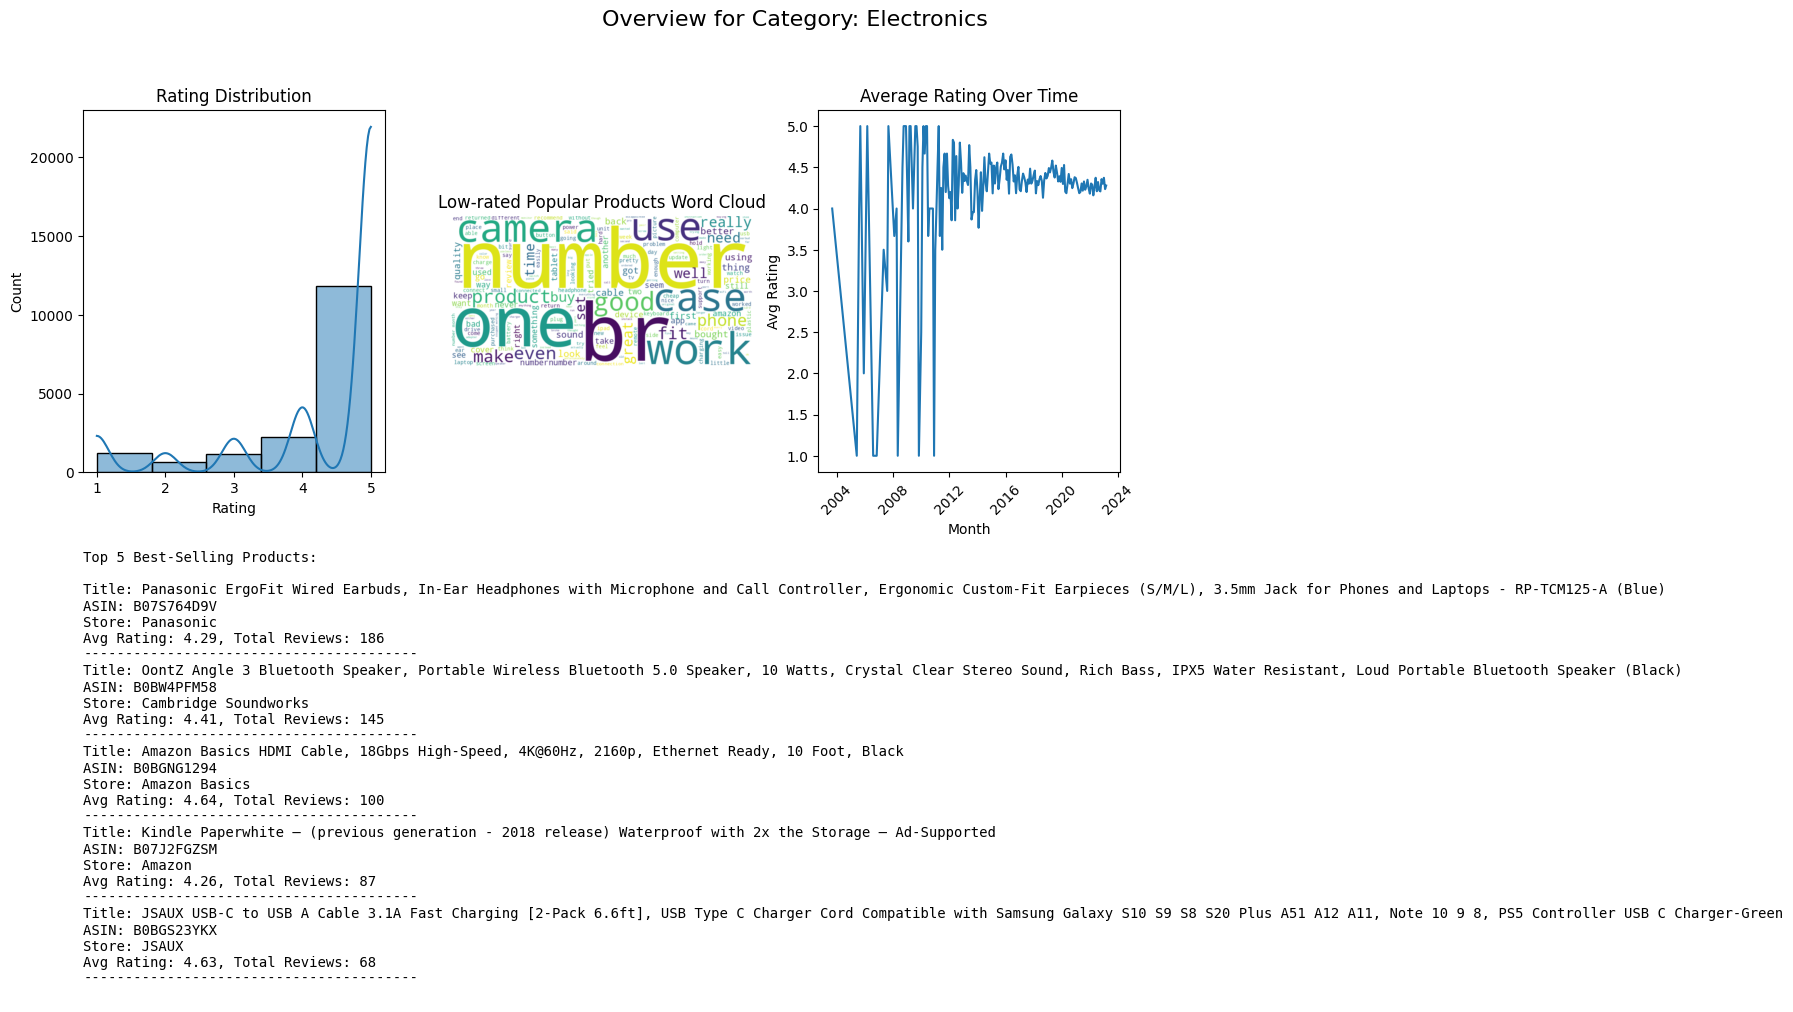

Visualizing: Movies_and_TV


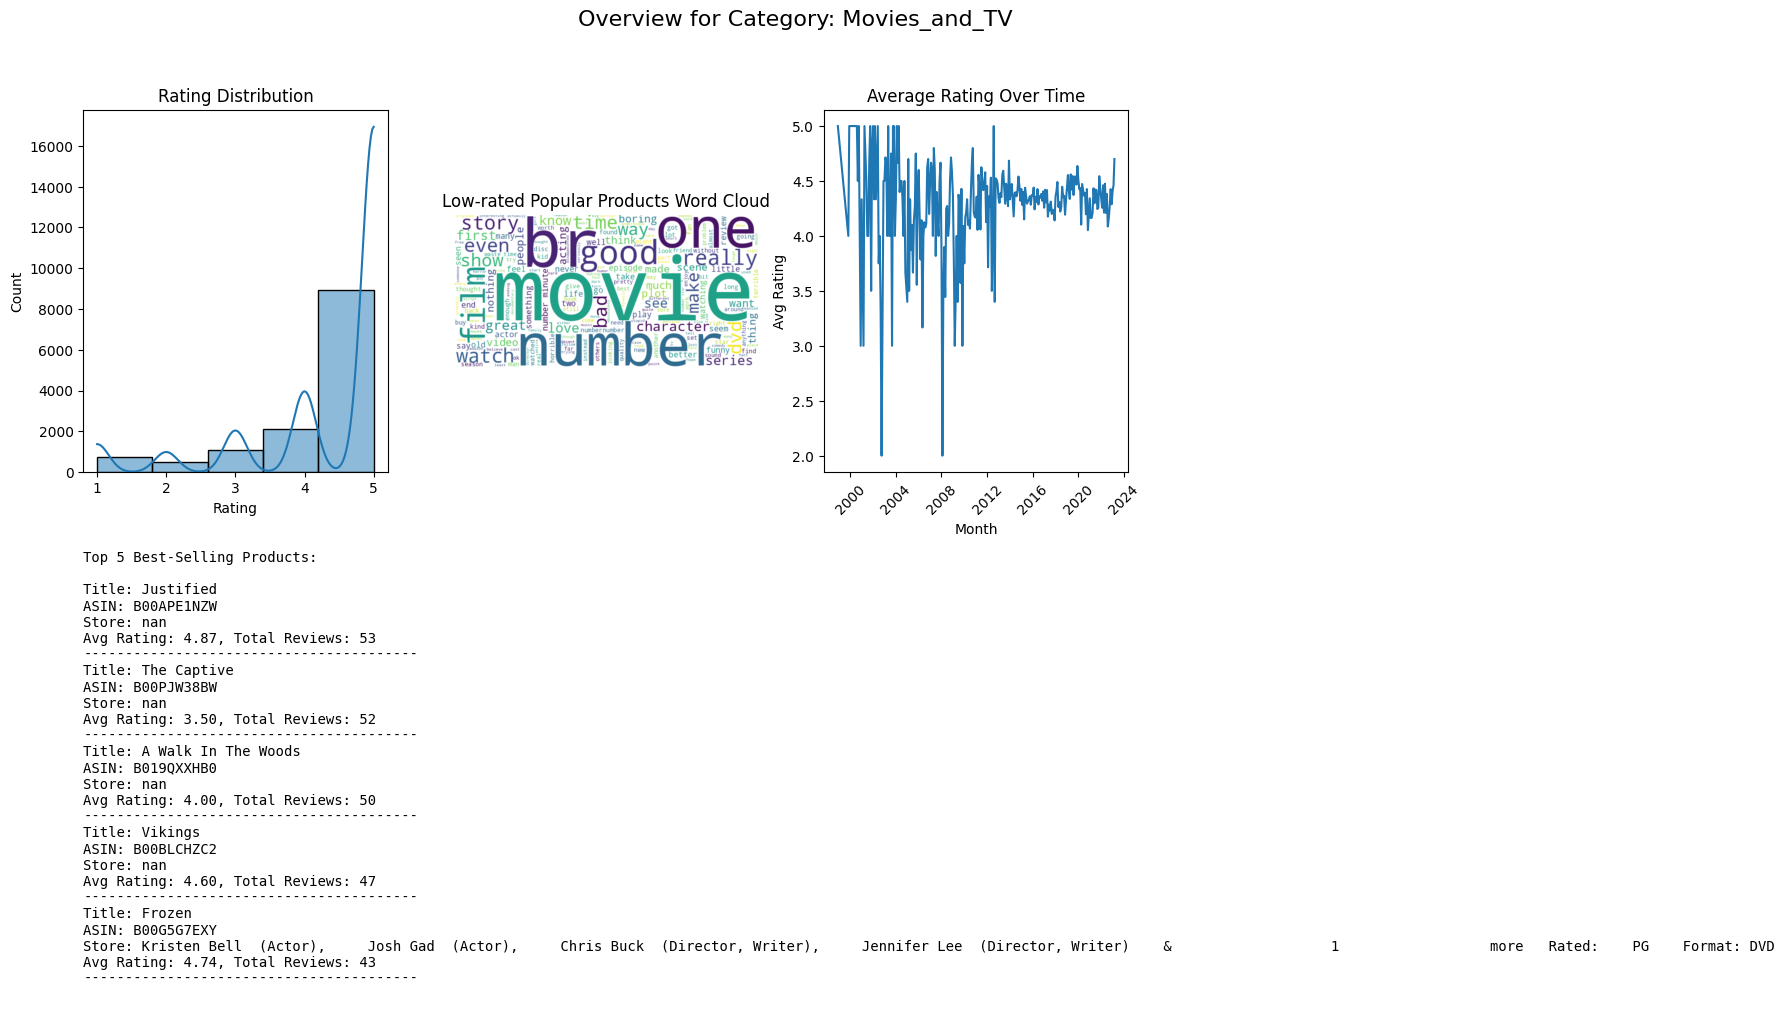

Visualizing: Sports_and_Outdoors


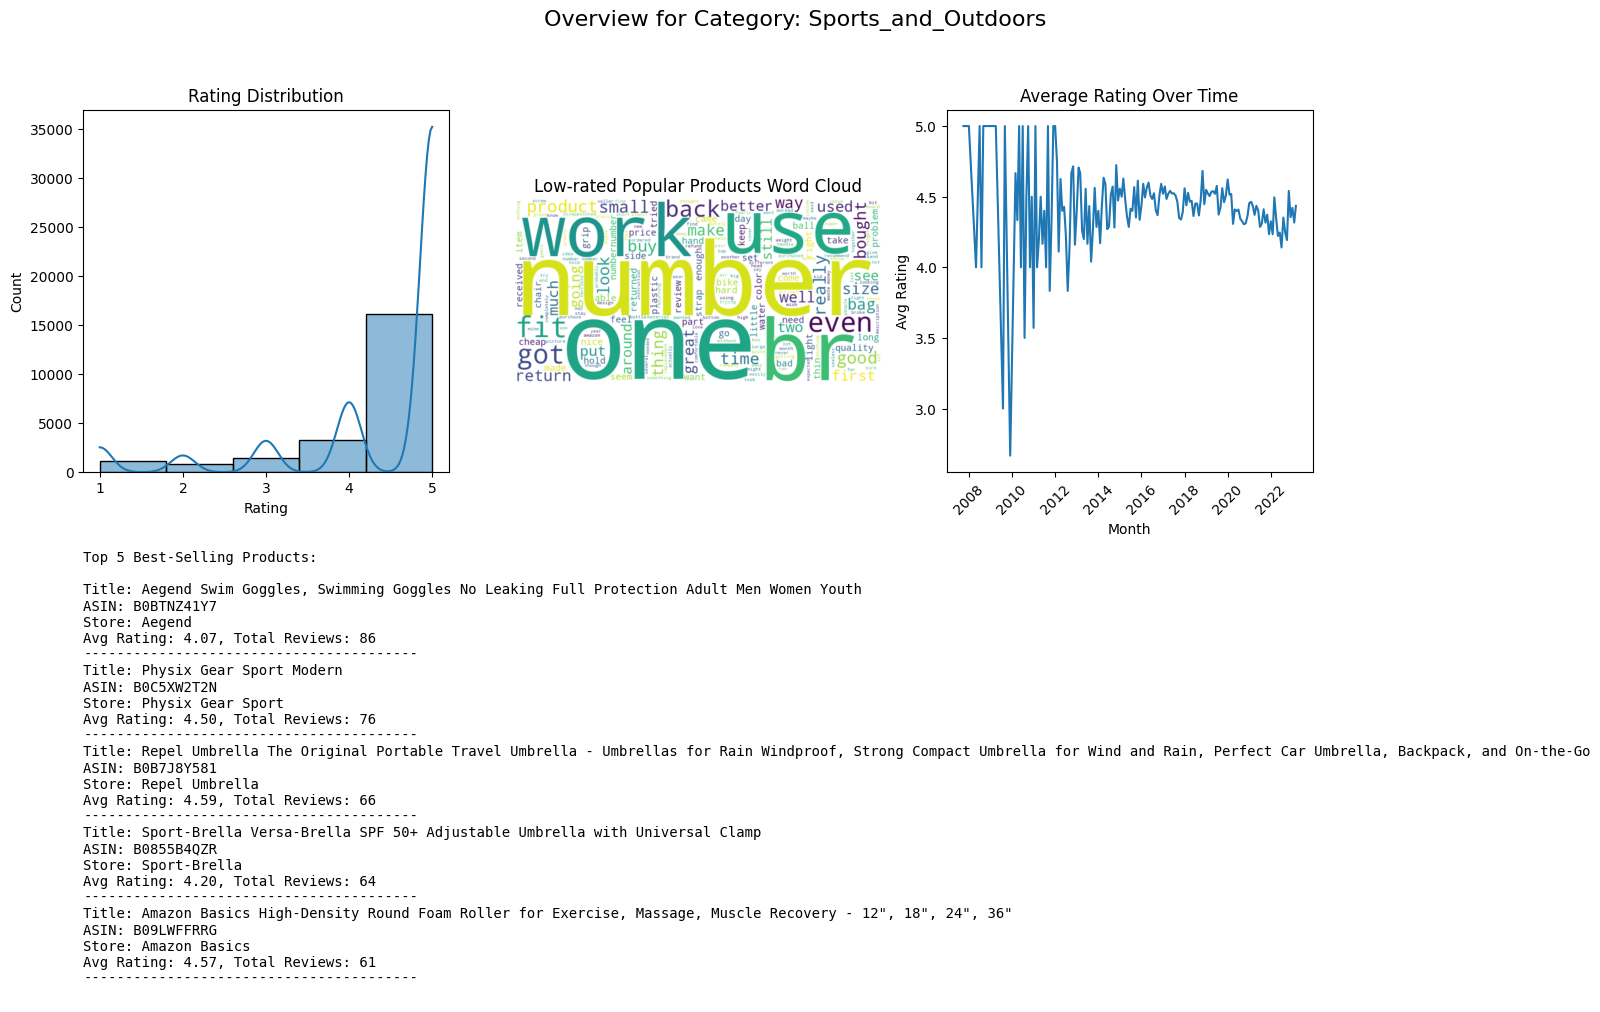

In [6]:
for category, *_ in datasets_info:
    print(f"Visualizing: {category}")
    df = pd.read_csv(f"{category}_cleaned.csv")
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df["month"] = df["timestamp"].dt.to_period("M").dt.to_timestamp()

    df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
    df = df.dropna(subset=["rating"])

    stats = df.groupby("parent_asin").agg(
        avg_rating=("rating", "mean"),
		count=("rating", "count")
	).reset_index()

    bad_asins = stats[
    	(stats["count"] >= 0) & (stats["avg_rating"] < 3)
	]["parent_asin"]

    bad_text = " ".join(df[df["parent_asin"].isin(bad_asins)]["cleaned_text"].dropna())
    wordcloud = None
    if bad_text.strip():
        wordcloud = WordCloud(width=800, height=400, background_color="white").generate(bad_text)

    # Prepare trend data
    trend = df.groupby("month")["rating"].mean().reset_index()

    # Prepare top products text
    top5 = df["parent_asin"].value_counts().head(5).index
    top_products_info = ""
    for asin in top5:
        item = df[df["parent_asin"] == asin].iloc[0]
        avg_rating = df[df["parent_asin"] == asin]["rating"].mean()
        total_reviews = len(df[df["parent_asin"] == asin])
        top_products_info += (
            f"Title: {item.get('title_meta', 'N/A')}\n"
            f"ASIN: {asin}\n"
            f"Store: {item.get('store', 'Unknown')}\n"
            f"Avg Rating: {avg_rating:.2f}, Total Reviews: {total_reviews}\n"
            f"{'-'*40}\n"
        )

    # Create subplots
    fig = plt.figure(figsize=(16, 10))
    fig.suptitle(f"Overview for Category: {category}", fontsize=16, y=1.02)
    gs = GridSpec(2, 3, figure=fig)

    # Histogram
    ax1 = fig.add_subplot(gs[0, 0])
    sns.histplot(df["rating"], bins=5, kde=True, ax=ax1)
    ax1.set_title("Rating Distribution")
    ax1.set_xlabel("Rating")
    ax1.set_ylabel("Count")

    # Word Cloud
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.set_title("Low-rated Popular Products Word Cloud")
    if wordcloud:
        ax2.imshow(wordcloud, interpolation="bilinear")
        ax2.axis("off")
    else:
        ax2.text(0.5, 0.5, "No data for word cloud", ha='center', va='center', fontsize=12)
        ax2.axis("off")

    # Trend Line
    ax3 = fig.add_subplot(gs[0, 2])
    sns.lineplot(data=trend, x="month", y="rating", ax=ax3)
    ax3.set_title("Average Rating Over Time")
    ax3.set_xlabel("Month")
    ax3.set_ylabel("Avg Rating")
    ax3.tick_params(axis='x', rotation=45)

    # Text Box for Top Products
    ax4 = fig.add_subplot(gs[1, :])
    ax4.axis("off")
    ax4.text(0, 1, f"Top 5 Best-Selling Products:\n\n{top_products_info}", ha='left', va='top', fontsize=10, family='monospace')

    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.show()


### **Task 2: Feature Engineering with Sentiment Scores and Ratings**


---

**Question**:

*You can choose from three alternative methods for combining text sentiment, VADER, Hugging Face models, and review ratings to create a final sentiment score. These approaches will help create more nuanced features for machine learning tasks like sentiment classification, recommendation, or customer segmentation.*

##### ***Alternative 1: Weighted Combination of Text Sentiment and Rating***
*In this approach, you will combine sentiment extracted from the review text using VADER or a Hugging Face model with the numerical rating provided by the user. This approach emphasizes blending both the subjective opinion from the text and the explicit satisfaction level indicated by the rating.*

***Steps:***
1.  ***Sentiment Extraction from Review Text:***
    - ***VADER Sentiment:*** *VADER Sentiment: Use the VADER sentiment analyzer to derive a sentiment score from the review text. This score typically ranges from -1 (negative) to +1 (positive).*\

    - ***Hugging Face Sentiment Model**: Alternatively, you can use a pre-trained sentiment model from Hugging Face (e.g., **DistilBERT, RoBERTa**) for a more context-sensitive sentiment classification. The model will classify the review as **positive, negative, or neutral**.*


2. ***Normalize the Rating:***
    - *Convert the numerical **rating** (1 to 5 stars) into a normalized scale from 0 to 1:*
    $$Normalized\ Rating = \frac{Rating - 1}{4}$$
    *Note: This makes the rating comparable with the sentiment scores.*

3. ***Calculate the Final Sentiment Score:***
    -  *Combine the sentiment score from the text with the normalized rating using a weighted average:*
    $$Final\ Sentiment\ Score = w_1\ \times \ Text\ Sentiment\ +\ w_2\ \times\ Normalized\ Rating $$
    *Where w1 and w2 are weights that reflect the importance of text sentiment and rating, respectively. You can experiment with different weight values.* 

##### ***Alternative 2: Rating-Adjusted Sentiment***
*This approach involves adjusting the sentiment score based on the rating to ensure that the numerical rating reflects the intensity of sentiment more strongly.*
1. ***Sentiment Extraction from Review Text:***
    - *Use **VADER** or **Hugging Face Sentiment Models** to extract sentiment scores from the review text, which will be later classified as positive, neutral, or negative.*

2.  ***Adjust Sentiment Based on Rating:***
    -  *For reviews with higher ratings (e.g., 4 or 5 stars), amplify the sentiment score to reflect stronger positive sentiment. For lower ratings (e.g., 1 or 2 stars), adjust the sentiment score downward, making it more negative, even if the text is neutral or mildly positive.*
    - ***Adjusting Method:***
        - *For ratings of **4 or 5**, increase the sentiment score by a factor (e.g., adding 0.2).* 
        - *For ratings of **1 or 2**, decrease the sentiment score by a factor (e.g., subtracting 0.2).*

3. ***Final Sentiment Score:***
    - *Take the adjusted sentiment score and produce the final sentiment label.*

---

**Answer:**


We implemented **both Alternative 1 and Alternative 2** for generating enriched sentiment scores by combining the review text sentiment and user rating.


- In **Alternative 1**, we used a weighted average of:
    - the sentiment score extracted from the review text, and
    - the normalized user rating using the formula:
    $$
    \text{Normalized Rating} = \frac{Rating - 1}{4}
    $$
    The weights `w_text` and `w_rating` were configurable to allow tuning. We supported both **VADER** and transformer-based models (**DistilBERT**, **RoBERTa**, **BERT**) as sentiment extractors. The final score was computed using the method `sentiment_score_weighted_text_rating()`.

- In **Alternative 2**, we adjusted the sentiment score **after extraction**, based on the star rating:
    - Ratings ≥ 4 increased the sentiment score (e.g., +0.2)
    - Ratings ≤ 2 decreased it (e.g., −0.2)

    This adjustment was implemented in the method `sentiment_score_rating_adjusted()`, preserving score boundaries between −1 and +1.

Both methods were encapsulated in a reusable class called `SentimentScoreWithRating`, supporting both **VADER** and **transformer-based models** from Hugging Face (DistilBERT, RoBERTa, BERT). This flexible design allows experimentation with different combinations for better sentiment feature engineering.

---


In [7]:
class SentimentScoreWithRating:
    def __init__(self, method="vader"):
        """
        method: "vader" or one of ["distilbert", "roberta", "bert"]
        """
        self.method = method.lower()
        if self.method == "vader":
            self.analyzer = SentimentIntensityAnalyzer()
        elif self.method in ["distilbert", "roberta", "bert"]:
            model_map = {
                "distilbert": "distilbert-base-uncased-finetuned-sst-2-english",
                "roberta": "cardiffnlp/twitter-roberta-base-sentiment",
                "bert": "nlptown/bert-base-multilingual-uncased-sentiment"
            }
            self.analyzer = pipeline("sentiment-analysis", model=model_map[self.method])
        else:
            raise ValueError("Unsupported method")

    def extract_sentiment_score(self, text):
        """
        Returns a sentiment score in range [-1, +1]
        """
        if self.method == "vader":
            score = self.analyzer.polarity_scores(text)["compound"]
            return score
        else:
            result = self.analyzer(text[:512])[0]
            label = result["label"]

            if self.method == "distilbert":
                return 1.0 if "positive" in label.lower() else -1.0

            elif self.method == "roberta":
                # LABEL_0 = negative, LABEL_1 = neutral, LABEL_2 = positive
                if label == "LABEL_2":
                    return 1.0
                elif label == "LABEL_0":
                    return -1.0
                else:
                    return 0.0

            elif self.method == "bert":
                # label is '1 star', '2 stars', ..., '5 stars'
                stars = int(label.split()[0])
                return (stars - 3) / 2  # Maps 1→-1, 3→0, 5→+1

            else:
                raise ValueError("Unsupported method")


    def normalize_rating(self, rating):
        """
        Normalize rating from 1-5 stars to 0-1
        """
        return (rating - 1) / 4

    def sentiment_score_weighted_text_rating(self, text, rating, w_text=0.5, w_rating=0.5):
        """
        Combine text sentiment and normalized rating via weighted average
        """
        sentiment = self.extract_sentiment_score(text)
        norm_rating = self.normalize_rating(rating)
        combined_score = w_text * sentiment + w_rating * norm_rating
        return combined_score

    def sentiment_score_rating_adjusted(self, text, rating, adjustment=0.2):
        """
        Adjust sentiment based on rating intensity
        """
        sentiment = self.extract_sentiment_score(text)

        # Adjust based on rating range
        if rating >= 4:
            sentiment = min(sentiment + adjustment, 1.0)
        elif rating <= 2:
            sentiment = max(sentiment - adjustment, -1.0)
        # If rating == 3 → no adjustment

        return sentiment


### **Task 3: Feature Engineering with Price Metrics (Optional)**


---

**Question:**

1. ***Price-per-Feature Metrics:***
    - ***Objective**:  Create features that allow price comparison across products by normalizing price values against their unique attributes.*
    - ***Methods**: For products with various features (e.g., size, color, material), calculate the price per unit of feature. For example, a product like a "leather sofa" may be priced differently depending on its size (2-seater vs. 5-seater), and this can be normalized by dividing the price by the size to compare value for money.*
    - ***Tools**: Simple arithmetic operations or feature extraction tools like pandas can be used to compute these metrics.*

2. ***Normalized Ratings:***
    - ***Objective**: Address the potential bias of high-rating counts by creating a normalized score that adjusts ratings based on the volume of reviews.*
    - ***Methods**: Calculate the normalized rating by adjusting the product's average rating with respect to the number of reviews it has. A product with a high rating but few reviews may be more volatile, whereas one with many reviews will provide more stable, reliable data. Calculate a weighted rating using the formula:*
    $$WightedRating\ =\ Average\ Rating * \log{(ReviewCount\ +\ 1)}$$

*By creating these additional features, the dataset becomes more meaningful and allows subsequent machine learning models to learn better patterns from the data. **Feature importance** can later be assessed using techniques like Random Forest or Gradient Boosting Machines to determine the most relevant features for a particular model.*

---

**Answer**

We implemented **both** feature engineering objectives: **price-per-feature metrics** and **normalized (weighted) ratings**, across all product categories.

1. **Weighted Rating Calculation**  
   To reduce bias from products with very few ratings, we using the given formula.
   This transformation balances raw rating quality with the review volume, making it more reliable for use in modeling tasks like recommendation and ranking.

2. **Price-per-Unit Feature Extraction**  
   To allow price comparisons across products with varying units (e.g., 500ml, 20 tablets, 3 packs), we built a regex-based extraction pipeline. It searches both the product title and description for quantifiable terms such as:

   - Volume: `500ml`, `1 liter`, `12 fl oz`
   - Weight: `2kg`, `300g`
   - Quantity: `12 count`, `30 tablets`, `4 packs`
   - Size/Dimensions: `12 inches`, `10 wipes`, `5 pieces`

   The matched value was stored in a `quantity_extracted` column and used to calculate:
   $$
   \text{Price per Unit} = \frac{\text{Price}}{\text{Quantity Extracted}}
   $$

   If no quantity could be reliably extracted, we defaulted to `1` as a fallback to avoid missing values.

These engineered features were added to the cleaned dataset and inspected across all categories to ensure they were meaningful, numeric, and usable in future tasks such as regression, clustering, and product ranking.

---


In [8]:
for category, *_ in datasets_info:
    print(f"\nFeature Engineering for: {category}")

    # Load the cleaned dataset
    df = pd.read_csv(f"{category}_cleaned.csv")

    # Ensure numeric types
    df["average_rating"] = pd.to_numeric(df["average_rating"], errors='coerce')
    df["rating_number"] = pd.to_numeric(df["rating_number"], errors='coerce')
    df["price"] = pd.to_numeric(df["price"], errors='coerce')

    # 1. Weighted Rating
    df["weighted_rating"] = df["average_rating"] * np.log(df["rating_number"] + 1)

    # 2. Quantity extraction and pattern tracking
    quantity_patterns = [
		r"(\d+\.?\d*)\s*(?:ml|milliliter)",
		r"(\d+\.?\d*)\s*(?:fl\s*?oz|fluid ounce)",
		r"(\d+\.?\d*)\s*(?:g|gram)",
		r"(\d+\.?\d*)\s*(?:kg|kilogram)",
		r"(\d+\.?\d*)\s*(?:lb|pound)s?",
		r"(\d+\.?\d*)\s*(?:count|ct|pack|pk)",
		r"(\d+\.?\d*)\s*(?:l|liter)s?",
		r"(\d+\.?\d*)\s*mg",
		r"(\d+)\s*pieces?",
		r"(\d+)\s*tablets?",
		r"(?i)(\d+)\s*(?:count|ct|pack|pk|pc|pcs|piece|bag|bottle|bar|serving)s?\b",
		r"(?i)(\d+\.?\d*)\s*(?:ounce|oz)s?",
		r"(?i)\b(\d+)\s*per\s*(?:pack|bottle)\b",
		r"(?i)(\d+)\s*(?:sheets|pads|wipes)\b",
		r"(?i)(\d+)\s*(?:inch|in)\b",
	]

    df["quantity_extracted"] = np.nan
    df["matched_pattern"] = np.nan

    for pattern in quantity_patterns:
        title_match = df["title"].str.extract(pattern, expand=True)
        desc_match = df["description"].str.extract(pattern, expand=True)

        title_qty = pd.to_numeric(title_match[0], errors="coerce")
        desc_qty = pd.to_numeric(desc_match[0], errors="coerce")

        match = title_qty.combine_first(desc_qty)

        mask = df["quantity_extracted"].isna() & match.notna()
        df.loc[mask, "quantity_extracted"] = match[mask]
        df.loc[mask, "matched_pattern"] = pattern

    # Default quantity = 1 if nothing was extracted
    df["quantity_extracted"] = df["quantity_extracted"].fillna(1)

    # Compute price per unit
    df["price_per_unit"] = df["price"] / df["quantity_extracted"]
    df["price_per_unit"] = df["price_per_unit"].replace([np.inf, -np.inf], np.nan)

    # Print sample of ALL features
    sample_all = df[[
        "title", "price", "average_rating", "rating_number",
        "weighted_rating", "quantity_extracted", "price_per_unit"
    ]].dropna().head(10)

    print("\nSample of generalized engineered features (top 10):")
    print(sample_all.to_string(index=False))



Feature Engineering for: Books

Sample of generalized engineered features (top 10):
                                                     title  price  average_rating  rating_number  weighted_rating  quantity_extracted  price_per_unit
    Half the size of her other books, but same price! WTH?  15.89             4.5          587.0        28.695271                 1.0       15.890000
                                   Granddaughter loves it!   4.59             4.9        36580.0        51.485693                 1.0        4.590000
                          Fun and adventurous book for all  23.17             5.0            3.0         6.931472                18.0        1.287222
                               Excellent read for all ages  14.99             4.5        20327.0        44.638895                 1.0       14.990000
                                                       Fav  11.68             4.6         2253.0        35.514124                 1.0       11.680000
               

## **Part 2 - Learning Tasks**

***Objective**:* 

*Apply machine learning techniques for clustering, recommendation systems, and sentiment analysis.*

### **Task 1: Clustering for Product Grouping**



---

**Question:**

*Group similar products within categories based on features like price, description, and ratings.*

1. ***Preprocessing*** :

    * *Clean and prepare the text data for model training by standardizing the input (Convert text to lowercase, remove punctuation, perform stemming…) . **Tools**: you can use `nltk` or `spaCy` for preprocessing tasks.*

    * *Scale numerical features (price, ratings) to prevent them from dominating the clustering.*

2. ***Vectorization*** :
    *  *Use **TF-IDF** for vectorization of product descriptions (don’t forget to experiment with the max_features parameter to limit the vocabulary size)*.

    * *Combine numerical features and TF-IDF vectors into a single feature matrix*.

3.  ***Clustering**: Perform clustering using **one clustering** method (e.g., K-Means with elbow method, DBSCAN). Visualize clusters using dimensionality reduction techniques (PCA, t-SNE)*.

***Evaluation Metric:***
Silhouette Score: Measures how similar items within a cluster are compared to items in
other clusters. A higher score indicates better-defined clusters. Analyze the
characteristics of the products within each cluster to gain insights. If you are using
K-means, use the elbow method to help determine the optimal number of clusters.

---

**Answer**

We performed clustering on each product category using a combination of **textual and numerical features**, following the required three-stage process.

1. **Preprocessing**  
   We combined the cleaned product title and description into a single field (`combined_text`). Missing values were replaced with empty strings.  
   Numerical features (`price` and `rating`) were scaled using `StandardScaler` after filling in missing values with the column means.

2. **Vectorization**  
   We applied **TF-IDF vectorization** to the combined text using a vocabulary limited to 10,000 terms (with `min_df=10`, `max_df=0.75` to remove rare and overly common terms).  
   The resulting TF-IDF vectors were horizontally stacked with the scaled numerical features to form the final feature matrix.

3. **Clustering and Evaluation**  
   We used **K-Means clustering**, experimenting with `k` from 2 to 10. Both the **Elbow Method** (based on distortion) and the **Silhouette Score** were used to determine the optimal number of clusters.  
   After identifying the best `k`, we re-ran K-Means with the optimal value and stored the cluster assignments.

   For visualization, we reduced the feature space to 2D using **PCA** and plotted a scatterplot of the clustered products. This helped in identifying how well-separated the clusters were.

4. **Cluster Analysis**  
   For each cluster, we computed average **rating**, **price**, and the number of products it contains.  
   We also printed a small sample of representative products per cluster to qualitatively inspect their attributes.

The final clustered datasets were saved as `{category}_clustered.csv` for all five categories.


---



Clustering for Books


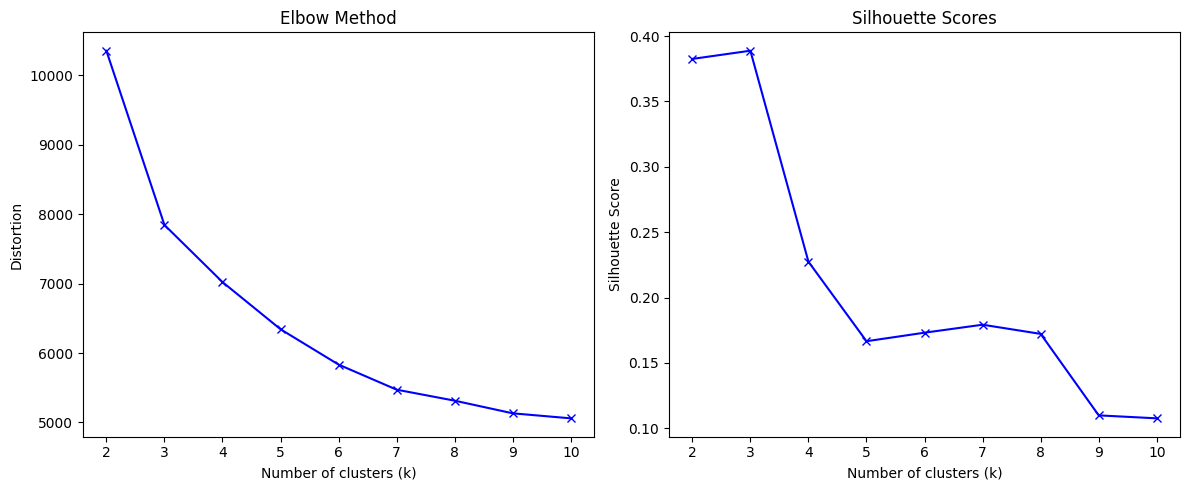

Optimal k for clusters: 3


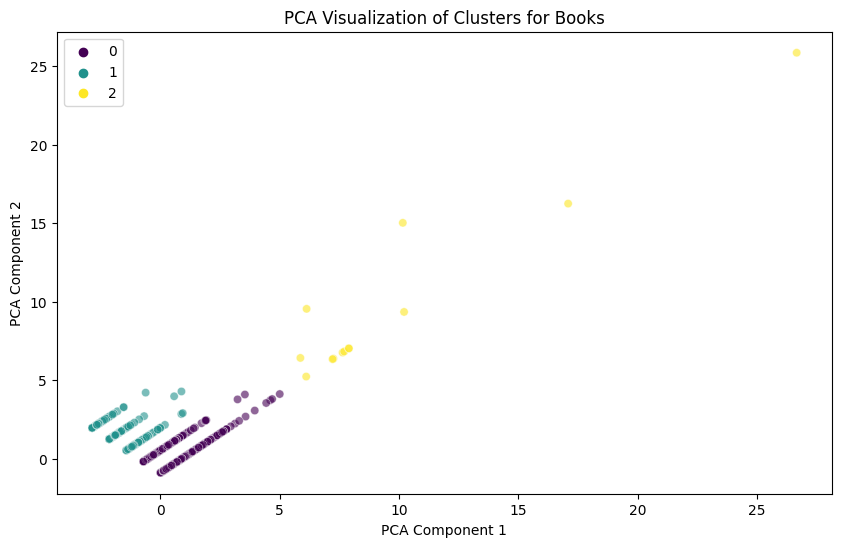


Cluster Statistics:
           rating       price  title_meta
cluster                                  
0        4.739808   15.695612        3851
1        2.447403   14.793768         751
2        4.384615  390.328462          13

Cluster 0 Sample Products:
                                                         title_meta  rating  price
Harry Potter and the Prisoner of Azkaban (Harry Potter, Book 3) (3)     5.0  15.74
        Modern Blocks: 99 Quilt Blocks from Your Favorite Designers     5.0  40.50
                              The Conspiracy (Seacliff High Book 4)     5.0   0.00

Cluster 1 Sample Products:
                                                                  title_meta  rating  price
Quilts from the House of Tula Pink: 20 Fabric Projects to Make, Use and Love     2.0  12.99
                    The Rules of Magic: A Novel (The Practical Magic Series)     3.0  11.71
                                            Watercolor with Me in the Jungle     3.0  15.89

Cluster 2 Sa

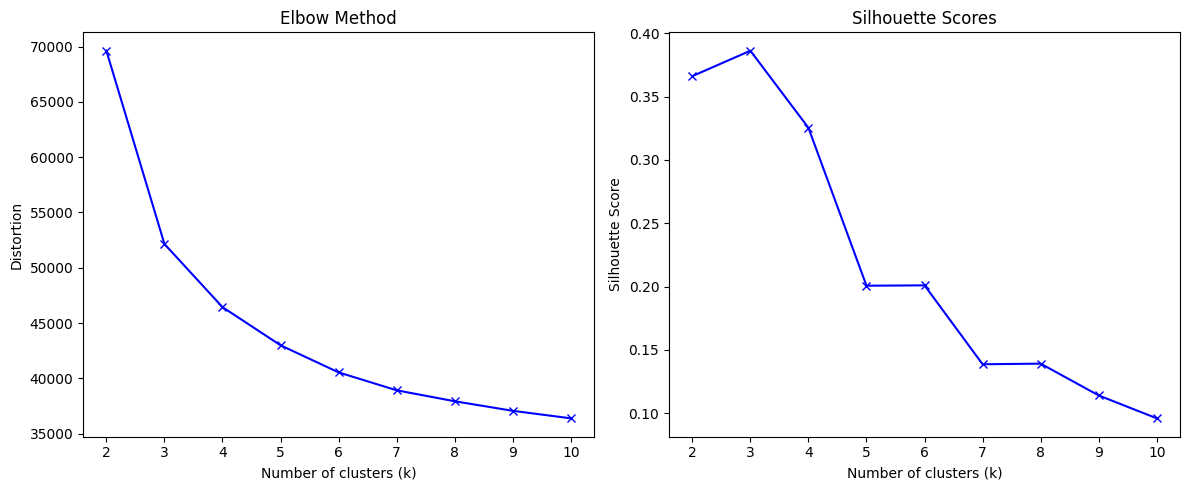

Optimal k for clusters: 3


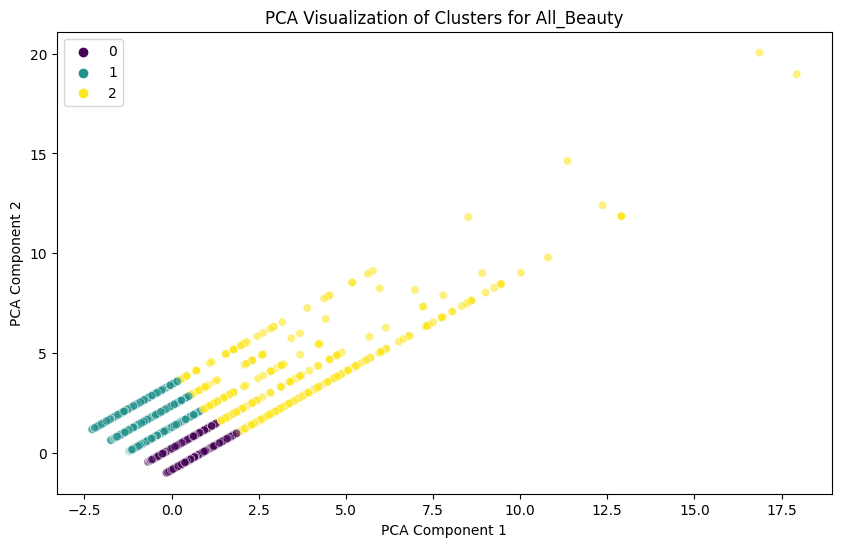


Cluster Statistics:
           rating       price  title_meta
cluster                                  
0        4.845404   18.390414       24399
1        1.958386   17.654270        7113
2        4.350913  131.319158         986

Cluster 0 Sample Products:
                                                                       title_meta  rating  price
                                            Mitchell's Wool Fat Shave Refill Soap     5.0  15.87
KoluaWax | Beach Legs Hard Wax Beads (1lb Bag) | For Legs, Back & More | Lavender     5.0  21.99
                             Beauty Town Luxury Wide Band Satin Bonnet Cap (Pink)     5.0   4.99

Cluster 1 Sample Products:
                                                                                                                                                                                  title_meta  rating  price
                                                                                                                         

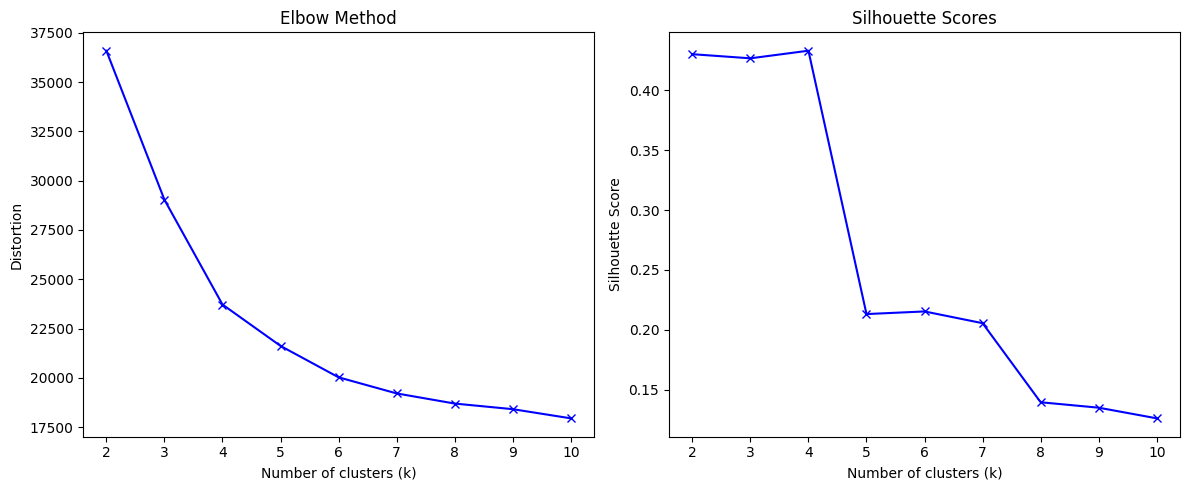

Optimal k for clusters: 4


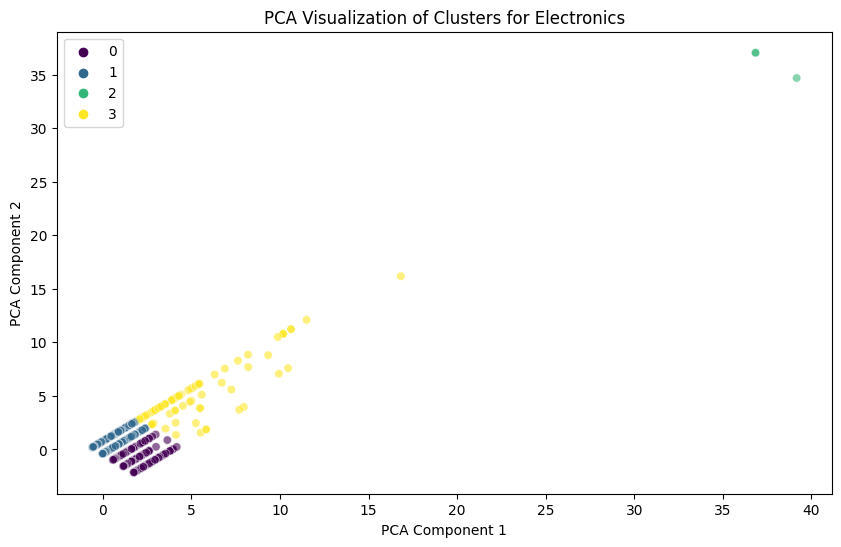


Cluster Statistics:
           rating        price  title_meta
cluster                                   
0        1.968317    57.219073        3030
1        4.841728    49.227983       13938
2        3.666667  9997.990000           3
3        4.486726  1287.497257         113

Cluster 0 Sample Products:
                                                                                                                title_meta  rating  price
ArmorSuit MilitaryShield Screen Protector for Google Nexus 7 (Original 1st Gen) - [Max Coverage] Anti-Bubble HD Clear Film     3.0   9.95
           TOPESEL 5 Pack 64GB USB 2.0 Flash Drive Memory Stick Thumb Drives (5 Mixed Colors: Black Blue Green Red Silver)     1.0  22.99
                 CYLYH 7x5ft Brown Wood Backdrop for Photography Customized Vintage Background for Photo Studio Props D104     1.0  10.99

Cluster 1 Sample Products:
                                                                                                                 

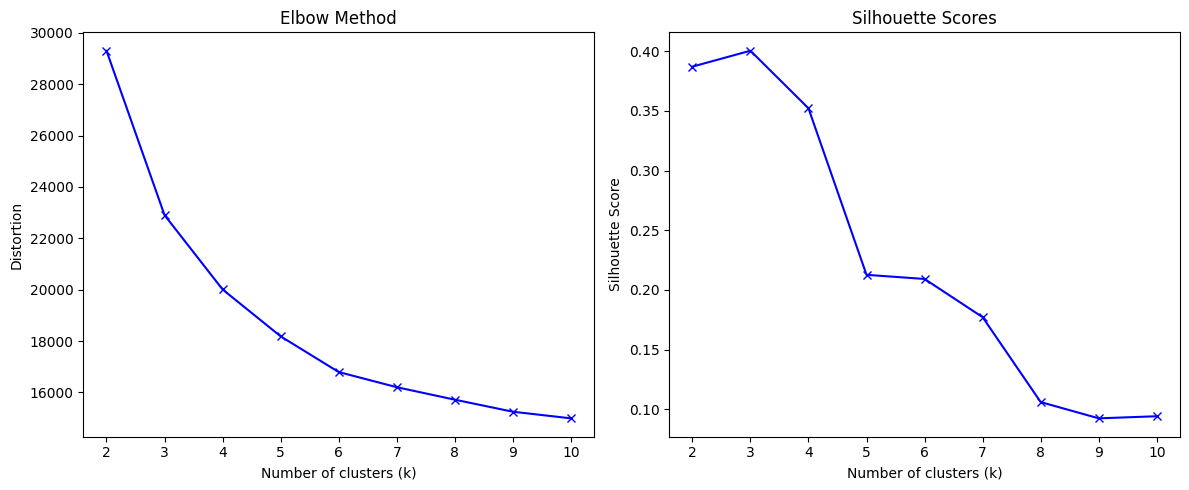

Optimal k for clusters: 3


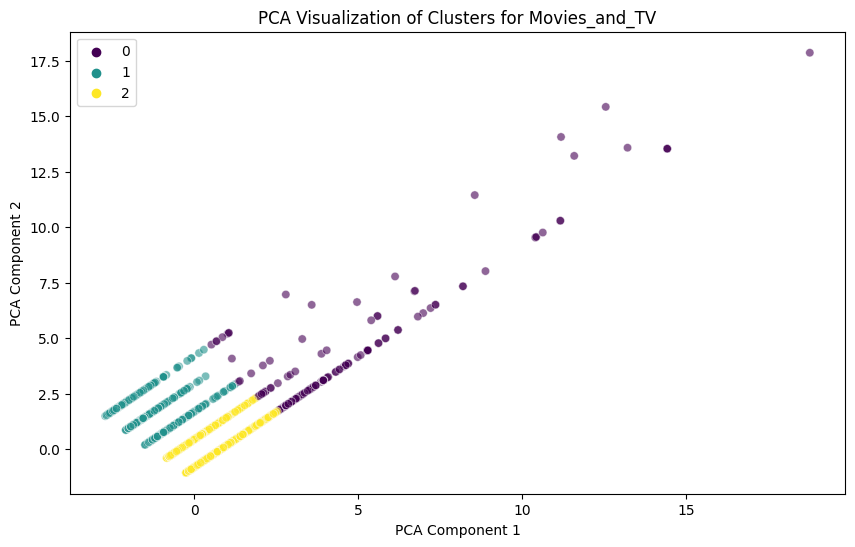


Cluster Statistics:
           rating       price  title_meta
cluster                                  
0        4.494253  130.532644         174
1        2.153079   14.594662        2306
2        4.809838   15.862065       10896

Cluster 0 Sample Products:
                                                    title_meta  rating  price
                         The Godzilla Collection (Vol 1 and 2)     5.0 169.91
                                     The Vietnam War Ken Burns     5.0  77.96
Jim Henson's the Storyteller - The Definitive Collection [DVD]     5.0 113.77

Cluster 1 Sample Products:
              title_meta  rating  price
               Meet Dave     3.0   9.98
                The Pact     3.0   5.99
Lower Body Pilates [DVD]     3.0   6.99

Cluster 2 Sample Products:
                                                            title_meta  rating  price
Sing-Along Songs: Supercalifragilisticexpialidocious - I Love to Laugh     5.0   6.29
                                         

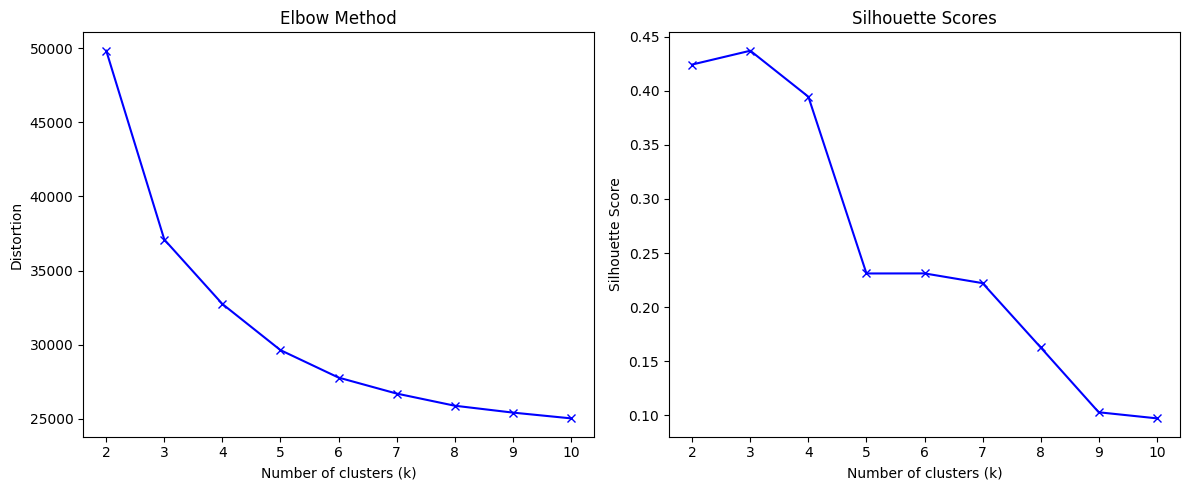

Optimal k for clusters: 3


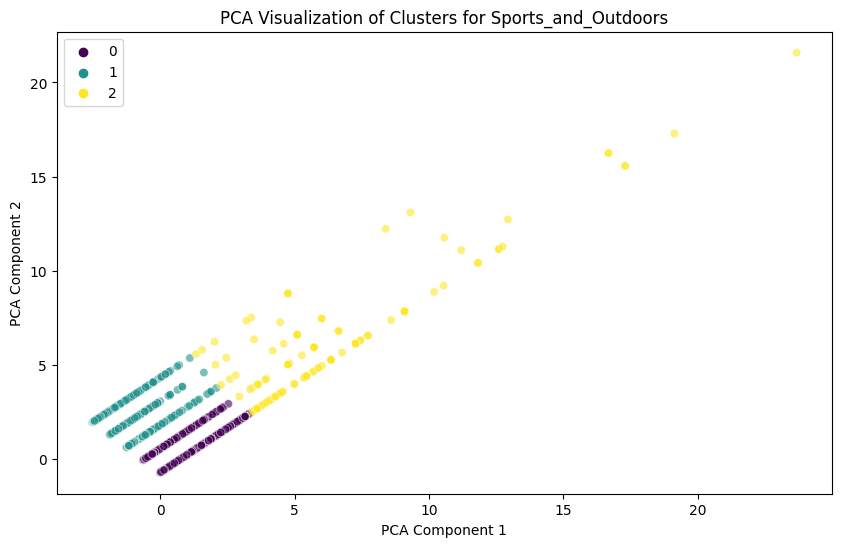


Cluster Statistics:
           rating       price  title_meta
cluster                                  
0        4.831820   37.274525       19277
1        2.089460   35.250162        3387
2        4.419355  703.488817         186

Cluster 0 Sample Products:
                                              title_meta  rating  price
BalanceFrom Fully Adjustable Ankle Wrist Arm Leg Weights     5.0  18.40
             PRO SPECIALTIES GROUP INC MLB Playing Cards     4.0  12.19
                               Cressi Men's Short Sleeve     4.0  44.95

Cluster 1 Sample Products:
                                                                                    title_meta  rating  price
   Ivysport Hoodie Sweatshirt, Unisex, Premium Cotton, Classic Arch with University Crest Logo     2.0  54.95
Football Can & Bottle Holder Insulator Beverage Huggie Cooler (Dallas (Cowboys) - Mesh Holder)     1.0  16.99
              SweatyRocks Women's Cutout Leggings Skinny Yoga Pants Runing Jogger Active Tight 

In [9]:
def cluster_category(category):
    df = pd.read_csv(f"{category}_cleaned.csv")

    # Fill NaN values with empty string
    df['cleaned_title_meta'] = df['cleaned_title_meta'].fillna('')
    df['cleaned_description'] = df['cleaned_description'].fillna('')

    df['combined_text'] = df['cleaned_title_meta'] + " " + df['cleaned_description']

    # TF-IDF Vectorization
    tfidf = TfidfVectorizer(max_features=100000,stop_words='english', min_df=2, max_df=0.8)
    tfidf_matrix = tfidf.fit_transform(df['combined_text'])

    # Scale the numerical features
    numerical_features = df[['price', 'rating']].copy()
    # Fill NaN values in numerical features with mean or appropriate value
    numerical_features = numerical_features.fillna(numerical_features.mean())
    scaler = StandardScaler()
    numerical_scaled = scaler.fit_transform(numerical_features)

    feature_matrix = hstack([tfidf_matrix, numerical_scaled])

    # Elbow method to find the best K for clustering
    distortions = []
    silhouette_scores = []
    K_range = range(2, 11)

    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(feature_matrix)
        distortions.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(feature_matrix, kmeans.labels_))

    # Plot Elbow method
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(K_range, distortions, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')

    # Plot Silhouette scores
    plt.subplot(1, 2, 2)
    plt.plot(K_range, silhouette_scores, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores')
    plt.tight_layout()
    plt.show()

    optimal_k = K_range[np.argmax(silhouette_scores)]
    print(f"Optimal k for clusters: {optimal_k}")

    # Perform clustering with the optimal number of clusters we found from elbow method
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    clusters = kmeans.fit_predict(feature_matrix)
    df['cluster'] = clusters

    pca = PCA(n_components=2)
    reduced_features = pca.fit_transform(feature_matrix.toarray())

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1],
                    hue=clusters, palette='viridis', alpha=0.6)
    plt.title(f'PCA Visualization of Clusters for {category}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

    # Analyze cluster characteristics
    cluster_stats = df.groupby('cluster').agg({
        'rating': 'mean',
        'price': 'mean',
        'title_meta': 'count'
    }).rename(columns={'title': 'count'})

    print("\nCluster Statistics:")
    print(cluster_stats)

    # Print sample products from each cluster
    for cluster_id in range(optimal_k):
        print(f"\nCluster {cluster_id} Sample Products:")
        sample_products = df[df['cluster'] == cluster_id][['title_meta', 'rating', 'price']].sample(3)
        print(sample_products.to_string(index=False))

    return df


# Perform clustering for each category
for category, *_ in datasets_info:
    print(f"\nClustering for {category}")
    clustered_df = cluster_category(category)
    clustered_df.to_csv(f"{category}_clustered.csv", index=False)

### **Task 2: Recommendation System**


---

**Question**:

*A recommendation system suggests products to users based on past behavior and preferences. This task involves two major techniques: **Collaborative Filtering** and **Content-Based Filtering**. You can use products from only one category for the recommendation system. Optional - Use products from multiple categories for the recommendation system.*

***Data Prepatation***:
- *For CF, the data needs to be in a suitable format (user-item interactions, ratings). You will need the following fields from the dataset: user_id, asin, rating*

- *For CBF, the preprocessed product descriptions and other relevant attributes are needed (asin, text, price, category, title). You should preprocess the text, and title. You should also normalize the price. Finally, one hot encoding, or another method to convert the category into numerical features, if products from multiple categories are being used.*


***Collaborative Filtering** using scikit-learn, implement a user-based and item-based collaborative filtering (CF) system that generates personalized book recommendations for a given user. Based on the user’s past purchases and ratings, the CF system should recommend the products with their predicted scores. Evaluate the recommendations by
showing the top-K recommended products and their predicted ratings.*

- ***User-Based Collaborative Filtering***
    - *Create a user-item matrix from the training data, filling missing values with 0.*
    - *Calculate the cosine similarity between users using sklearn.metrics.pairwise.cosine_similarity*
    - *For each user-item pair in the test set:*
        - *Find the K most similar users from the training set*
        - *Calculate a predicted rating based on the weighted average of ratings from the similar users.*

- ***Item-Based Collaborative Filtering***
    - *Create a user-item matrix from the training data, filling missing values with 0.*
    - *Transpose the matrix, and then calculate the cosine similarity between items using cosine similarity.*
    - *For each user-item pair in the test set:*
        - *Find the K most similar items from the training set (Try starting with K=5).*
        - *Calculate a predicted rating based on the weighted average of ratings from the similar items.*


***Content-Based Filtering:***

- *Convert product descriptions into **Word2Vec** vectors (it is better to download and use pre-trained embeddings).*
- *Calculate cosine similarity between product vectors.*
- *Recommend top-K products with high similarity scores.*
- *Optional: Evaluate the recommendations using Recall at K (which measures how many of the relevant items appear in the top-K recommended products).*

***Hybrid Approach: Weighted Average:***
- *Combine the recommendations from CF and CBF (For this approach, combine the results from collaborative and content-based filtering, using the asin field to connect the data)*
- *Method: Assign weights to the CF and CBF scores and combine them.* $$ Hybrid\ Score\ =\  (CF\ Score\ *\ CF\ Weight)\ +\ (CBF\ Score\ *\ CBF\ Weight)$$ Example Weights: CF weight: 0.7, CBF weight: 0.3

- *Evaluate the performance of the hybrid system. (experimentation is crucial to find he optimal weights for the hybrid system).*

***Evaluation**: Analyze the strengths and weaknesses of each approach.*



---

**Answer**

We implemented a full recommendation pipeline using three techniques: **Collaborative Filtering (CF)**, **Content-Based Filtering (CBF)**, and a **Hybrid Approach**, evaluated on a per-user basis using Recall@K.

##### Evaluation

We evaluated all recommendation methods using **Recall@100**, on a user-wise test split (80/20) with a minimum of 5 ratings per user. The system iterated over test users and compared predicted top-K ASINs against held-out items.

**Key Observations**:
- **Item-based CF** and **Hybrid** methods consistently outperformed others in recall.
- **CBF** performed well for users with limited history, thanks to rich product text.
- **Random** baselines showed significantly lower recall, validating the effectiveness of our models.

All methods were modular, allowing consistent benchmarking and flexible weighting.

    
---

##### 1. Collaborative Filtering (CF)

We implemented both **user-based** and **item-based** collaborative filtering using cosine similarity:

- A **user-item matrix** was constructed from the training data, where missing values were filled with 0.
- **User-Based CF**:
  - For a target user and unseen item, we found the top-K similar users who rated that item.
  - The predicted score was computed as a weighted average of these ratings using user similarity scores.
- **Item-Based CF**:
  - We transposed the matrix and computed item-to-item similarities.
  - For a given user and item, we predicted a score by comparing the item to those the user already rated.

Recommendations were generated by ranking predicted scores for unrated items. We stored and evaluated both versions separately.

In [10]:
# Predict a user's rating for an item using user-based collaborative filtering
def predict_user_based(user_id, item_asin, k=20):
    if item_asin not in user_item_matrix.columns:
        return 0

    # Get top-k similar users
    sim_users = user_similarity_df[user_id].sort_values(ascending=False)[1:k+1]

    # Ratings from similar users to the given item
    relevant_ratings = user_item_matrix.loc[sim_users.index, item_asin]

    # Compute weighted of ratings based on user similarity
    weighted_ratings = np.dot(sim_users.values, relevant_ratings)
    sim_sum = sim_users.values.sum()
    return weighted_ratings / sim_sum if sim_sum != 0 else 0

# Predict a user's rating for an item using item-based collaborative filtering
def predict_item_based(user_id, item_asin, k=50):
    if item_asin not in user_item_matrix.columns:
        return 0

	# Get items that the user has already rated
    user_ratings = user_item_matrix.loc[user_id]
    rated_items = user_ratings[user_ratings > 0]

	# find similarities between the given item and the items rated by the user
    similarities = item_similarity_df.loc[item_asin, rated_items.index]
    top_k = similarities.sort_values(ascending=False).head(k)

    if top_k.sum() == 0:
        return 0

	# return weighted average of the user's ratings for similar items
    weighted_sum = np.dot(top_k.values, rated_items[top_k.index])
    return weighted_sum / top_k.sum()

# Recommend top-k items for a user using either user- or item-based collaborative filtering
def recommend_cf(user_id, k=50, method="user"):
    predictions = {}

    for asin in user_item_matrix.columns:
        if user_item_matrix.loc[user_id, asin] == 0:
            if method == "user":
                predictions[asin] = predict_user_based(user_id, asin, k)
            elif method == "item":
                predictions[asin] = predict_item_based(user_id, asin, k)

    top_k_asins = sorted(predictions.items(), key=lambda x: x[1], reverse=True)[:k]
    return df[df['asin'].isin([a[0] for a in top_k_asins])][['asin', 'title_meta', 'price']]

##### 2. Content-Based Filtering (CBF)

For CBF, we used **Word2Vec embeddings** to encode each product’s combined textual features (title + description):

- We loaded a pre-trained **Google News Word2Vec** model.
- Each product was represented by averaging its word embeddings.
- A user profile vector was generated by averaging the vectors of products the user rated ≥ 4.
- Cosine similarity was used to compute similarity between the user profile and all product vectors.
- The top-K most similar products were recommended.

This method worked well even with sparse user histories, as long as enough textual information was present.

In [11]:
# Recommend top-k items for a user based on similarity to items they’ve rated highly
def recommend_cbf(user_id, top_k=100):
    user_ratings = user_item_matrix.loc[user_id]
    liked_asins = user_ratings[user_ratings >= 4].index

    # Get vectors for liked items
    liked_vectors = []
    for asin in liked_asins:
        if asin in asin_to_index:
            liked_vectors.append(vector_matrix[asin_to_index[asin]])

    if not liked_vectors:
        return pd.DataFrame(columns=['asin', 'title_meta', 'price'])

    # Create user profile by averaging liked vectors
    user_profile = np.mean(liked_vectors, axis=0)
    
    # Compute similarity of all items to the user profile
    similarities = cosine_similarity([user_profile], vector_matrix)[0]
    sim_scores = list(enumerate(similarities))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    top_indices = [i[0] for i in sim_scores[:top_k]]
    return df[df['asin'].isin(w2v_df.iloc[top_indices]['asin'])][['asin', 'title_meta', 'price']]

##### 3. Hybrid Recommendation System

The hybrid system combined both CF and CBF scores using a weighted average:

$$
\text{Hybrid Score} = (w_{cf} \cdot \text{CF Score}) + (w_{cbf} \cdot \text{CBF Similarity})
$$

- CF Score was computed as the average of user-based and item-based predictions.
- CBF Similarity was the average similarity between the candidate product and products the user rated highly.
- Default weights used were **CF: 0.6** and **CBF: 0.4**.

This allowed us to balance behavioral patterns with content similarity, leading to more robust and explainable recommendations.

In [12]:
def recommend_hybrid(user_id, k=100, cf_weight=0.6, cbf_weight=0.4):
    predictions = {}

	# Loop through items not yet rated by the user
    for asin in user_item_matrix.columns:
        if user_item_matrix.loc[user_id, asin] == 0:
            # CF Score (average of user- and item-based)
            # Predict how much the user might like this product based on what similar users liked and what similar products the user liked
            user_cf_score = predict_user_based(user_id, asin, k//3) # get average score from ratings to current item from similar users
            item_cf_score = predict_item_based(user_id, asin, k//3) # get average score from ratings the user gave to similar items
            cf_score = (user_cf_score + item_cf_score) / 2 # Average the two scores

            # CBF Score: average similarity score to items the user rated highly
            # Estimate how similar this product is to others the user liked
            cbf_sim_score = 0
            if asin in asin_to_index:
                user_rated_items = user_item_matrix.loc[user_id]
                liked_items = user_rated_items[user_rated_items >= 4].index # Products user liked
                sim_scores = []
                for liked_asin in liked_items:
                    if liked_asin in asin_to_index:
                        # Compare the current product with each liked product
                        sim = cosine_sim_matrix[asin_to_index[asin], asin_to_index[liked_asin]]
                        sim_scores.append(sim)
                if sim_scores:
                    cbf_sim_score = np.mean(sim_scores) # Average similarity to liked items

            # Final hybrid score
            hybrid_score = (cf_weight * cf_score) + (cbf_weight * cbf_sim_score)
            predictions[asin] = hybrid_score

    # Top-K recommendations
    top_k_asins = sorted(predictions.items(), key=lambda x: x[1], reverse=True)[:k]
    return df[df['asin'].isin([a[0] for a in top_k_asins])][['asin', 'title_meta', 'price']]

##### 4. Baseline Recommendations

To evaluate the effectiveness of our recommendation models, we implemented a **random recommendation baseline**.

This method selects `k` random products from the entire dataset, regardless of user preferences or item similarity:

In [13]:
# Generate random recommendations for the a user
def recommend_random(user_id, k=100):
    all_asins = df.pivot_table(index='user_id', columns='asin', values='rating').fillna(0).columns.tolist()
    random_asins = random.sample(all_asins, min(k, len(all_asins)))
    return df[df['asin'].isin(random_asins)][['asin', 'title_meta', 'price']]

##### 5. Training and Running

Once the models for **Collaborative Filtering**, **Content-Based Filtering**, and the **Hybrid approach** were implemented, we proceeded with dataset preparation and evaluation.

- For each category:
  - We cleaned and filtered the data to retain only necessary fields (`user_id`, `asin`, `rating`, `text`, `price`).
  - We split the dataset **per user** into training and test sets using an 80/20 ratio, skipping users with fewer than 5 ratings to ensure evaluation reliability.

- We then constructed:
  - A **user-item matrix** for CF methods
  - A **Word2Vec-based vector matrix** for CBF, using pre-trained embeddings
  - **Cosine similarity matrices** for users, items, and content vectors

- Using the helper method `get_recommendations()`, we generated the top-100 recommendations for each test user from:
  - `user_cf`
  - `item_cf`
  - `cbf`
  - `hybrid`
  - `random` (baseline)

- For evaluation, we used **Recall@100**, which measures how many of the test user's true positive items appeared in the top-100 predicted items.

This setup allowed for a unified and comparative benchmarking of all recommendation methods across different categories.

In [14]:
# Load pre-trained Word2Vec model
word2vec_path = "/kaggle/input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin"
word2vec_model = KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

# Convert a product's text description into a single vector using Word2Vec
def vectorize_text(text, model):
    words = text.split()
    word_vectors = []

    for word in words:
        if word in model:
            word_vectors.append(model[word])

    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Get cf, cbf, hybrid and random recommendations
def get_recommendations(user_id, asin_example=None, k=100):
    recommendations = {}

    # Collaborative Filtering - User
    cf_user = recommend_cf(user_id=user_id, k=k//3, method="user")
    recommendations['user_cf'] = cf_user

    # Collaborative Filtering - Item
    cf_item = recommend_cf(user_id=user_id, k=k//3, method="item")
    recommendations['item_cf'] = cf_item

    # Content-Based Filtering
    if asin_example is None:
        # Try to use an ASIN the user has rated highly
        user_ratings = user_item_matrix.loc[user_id]
        liked_asins = user_ratings[user_ratings >= 3].index
        if len(liked_asins) > 0:
            asin_example = liked_asins[0]

    cbf_recs = recommend_cbf(user_id=user_id, top_k=k//2) if asin_example else pd.DataFrame(columns=['asin', 'title_meta', 'price'])
    recommendations['cbf'] = cbf_recs

    # Hybrid Recommendation
    hybrid = recommend_hybrid(user_id=user_id, k=k)
    recommendations['hybrid'] = hybrid

    random_recs = recommend_random(user_id=user_id, k=k)
    recommendations['random'] = random_recs

    return recommendations

# Split per user
def train_test_split_userwise(df, test_size=0.2, min_ratings=5):
    train_rows, test_rows = [], []

    for user, group in df.groupby('user_id'):
        if len(group) < min_ratings:
            continue  # Skip users with fewer than min_ratings
        train, test = train_test_split(group, test_size=test_size, random_state=42)
        train_rows.append(train)
        test_rows.append(test)

    if not train_rows:  # Handle case where no users have enough ratings
        return pd.DataFrame(columns=df.columns), pd.DataFrame(columns=df.columns)
        
    train_df = pd.concat(train_rows)
    test_df = pd.concat(test_rows)
    return train_df, test_df

# Evaluate the model using recall metric - fraction of all relevant items that appear in the model’s top-k recommendations
def recall_at_k(recommended_asins, relevant_asins, k):
    if not relevant_asins:
        return np.nan
    recommended_top_k = recommended_asins[:k]
    hits = sum(1 for asin in relevant_asins if asin in recommended_top_k)
    return hits / len(relevant_asins)

# Process every category
for category, review_file, meta_file in datasets_info:
    print(f"\nProcessing category: {category}")
    
    # Load the cleaned dataset
    df = pd.read_csv(f"{category}_cleaned.csv")

    # Drop rows with missing essential data
    df = df.dropna(subset=['user_id', 'asin'])

    df['cleaned_title_meta'] = df['cleaned_title_meta'].fillna("")
    df['cleaned_description'] = df['cleaned_description'].fillna("")
    
    df = df[['user_id', 'asin', 'rating', 'title_meta', 'price', 'cleaned_title_meta', 'cleaned_description']]

    # Split the dataset to train/test in a userwise way
    train_df, test_df = train_test_split_userwise(df)
    user_item_matrix = train_df.pivot_table(index='user_id', columns='asin', values='rating').fillna(0)

    # Compute user similarity matrix
    user_similarity = cosine_similarity(user_item_matrix)
    user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

    # Transpose the user-item matrix to create an item-user matrix
    item_user_matrix = user_item_matrix.T

    # Compute item similarity
    item_similarity = cosine_similarity(item_user_matrix)
    item_similarity_df = pd.DataFrame(item_similarity, index=item_user_matrix.index, columns=item_user_matrix.index)

    # Combine text features
    w2v_df = train_df[['asin', 'cleaned_title_meta', 'cleaned_description']].drop_duplicates('asin').copy()
    w2v_df['combined_text'] = w2v_df['cleaned_title_meta'] + " " + w2v_df['cleaned_description']
    w2v_df['w2v_vector'] = w2v_df['combined_text'].apply(
        lambda x: vectorize_text(x, word2vec_model) if x.strip() else np.zeros(word2vec_model.vector_size)
    )

    w2v_df = w2v_df.reset_index(drop=True)
    asin_to_index = pd.Series(w2v_df.index, index=w2v_df['asin'])
    vector_matrix = np.vstack(w2v_df["w2v_vector"].values)
    cosine_sim_matrix = cosine_similarity(vector_matrix)

    # Evaluate each method
    evaluation_results = defaultdict(list)
    test_users = test_df['user_id'].unique()

    for user_id in test_users:
        if user_id not in user_item_matrix.index:
            continue
        user_test_asins = test_df[test_df['user_id'] == user_id]['asin'].tolist()
        recs = get_recommendations(user_id=user_id, k=100)

        for method in ['user_cf', 'item_cf', 'cbf', 'hybrid', 'random']:
            recommended_asins = recs[method]['asin'].tolist()
            recall = recall_at_k(recommended_asins, user_test_asins, k=100)
            if not np.isnan(recall):
                evaluation_results[method].append(recall)

    # Print evaluation for the category
    for method, recalls in evaluation_results.items():
        avg_recall = np.mean(recalls)
        print(f"{category} → {method} - Recall@100: {avg_recall:.4f}")


Processing category: Books
Books → user_cf - Recall@100: 0.0329
Books → item_cf - Recall@100: 0.0302
Books → cbf - Recall@100: 0.0437
Books → hybrid - Recall@100: 0.0731
Books → random - Recall@100: 0.0171

Processing category: All_Beauty
All_Beauty → user_cf - Recall@100: 0.1054
All_Beauty → item_cf - Recall@100: 0.0950
All_Beauty → cbf - Recall@100: 0.1229
All_Beauty → hybrid - Recall@100: 0.2298
All_Beauty → random - Recall@100: 0.0000

Processing category: Electronics
Electronics → user_cf - Recall@100: 0.0106
Electronics → item_cf - Recall@100: 0.0117
Electronics → cbf - Recall@100: 0.0155
Electronics → hybrid - Recall@100: 0.0303
Electronics → random - Recall@100: 0.0087

Processing category: Movies_and_TV
Movies_and_TV → user_cf - Recall@100: 0.0236
Movies_and_TV → item_cf - Recall@100: 0.0196
Movies_and_TV → cbf - Recall@100: 0.0233
Movies_and_TV → hybrid - Recall@100: 0.0418
Movies_and_TV → random - Recall@100: 0.0111

Processing category: Sports_and_Outdoors
Sports_and_Outdo

### **Task3: Classification task - sentiment analysis**


---

**Question**:

*Sentiment analysis aims to understand the emotional tone of **customer reviews**, **classifying them** as **positive**, **negative**, or **neutral**.*

1. ***Preprocessing**: Preprocessing steps will now be performed on the reviews*

2. ***Feature Extraction (vectorization)***

    1.  *Create **TF-IDF** features like you did for the descriptions in the previous task.*
    2.  *Use **Word2Vec**, or **FastText** for feature extraction on the reviews (it is better to use pre-trained embeddings).*
    3.  *If you have completed Task 3 you can also append the numerical features you created to the word vectors and experiment to see if they improve performance on the sentiment analysis task. Try thesentiment analysis task without and with the numerical features.*
    
3. ***Best model***

    - ***Objective**: Train different classifiers to predict sentiment labels from the features extracted from review texts.*
    - ***Approach**: Use the following classification models:*
        - ***Naive Bayes***
        - ***KNN***
        - ***Random forests***
        - ***Optional: Deep Learning Models**: More advanced models like **LSTM** or **BERT** can be used for more accurate sentiment predictions, especially when working with large datasets. Use the available functions from Hugging face library and perform the sentiment classification task with deep learning models*
    - ***Metrics for Evaluation**: **F1-Score**, which balances precision and recall. Create a table to showcase **results for all models and all feature sets**. (this is very important because it showcases the performance of your methods and gives you a way to compare different approaches) . All models will be trained exclusively on the training dataset. Model performance will be evaluated on the held-out test dataset.*

4. ***10-Fold Cross-Validation**: This will provide a more robust estimate of modelgeneralization (prevent overfitting). Evaluate and record the performance of eachmodel using 10-fold cross-validation on the **training data**.*

    ***Evaluation Metrics***:
    * *Calculate and record the following metrics:*
      * *Precision (Macro-average)*
      * *Recall (Macro-average)*
      * *F1-Score (Macro-average)*
      * *Accuracy*
       
    ***Results Presentation:***

    * *Create a clear and well-organized table to showcase the results for all models and feature sets. This table should include the evaluation metrics from the 10-fold cross-validation on the train set.*

        | Feature Set | Model         | Precision | Recall | F1-Score | Accuracy |
        |-------------|---------------|-----------|--------|----------|----------|
        | TF-IDF      | KNN           |           |        |          |          |
        | TF-IDF      | Naive Bayes   |           |        |          |          |
        | TF-IDF      | Random Forest |           |        |          |          |
        | Embeddings  | KNN           |           |        |          |          |
        | Embeddings  | Naive Bayes   |           |        |          |          |
        | Embeddings  | Random Forest |           |        |          |          |

    * *You then perform a **single, final evaluation on the test set**. For the test set, you should create a separate table (or section in your report) that shows the performance metrics (precision, recall, F1-score, accuracy) of each trained model.*
  
        | Model         | Precision | Recall | F1-Score | Accuracy |
        |---------------|-----------|--------|----------|----------|
        | KNN           |           |        |          |          |
        | Naive Bayes   |           |        |          |          |
        | Random Forest |           |        |          |          |


---

**Answer**: 

We performed a comprehensive exploratory analysis across all product categories after sentiment labeling. All categories were processed together in a single pipeline, and insights were extracted per category to assess text content and sentiment distribution.

The datasets are **highly unbalanced**, with many more positive reviews than neutral or negative ones — a common characteristic in e-commerce platforms where satisfied customers are more likely to leave reviews.

For each category, we extracted and visualized the following:

#####  **Word Cloud**
A word cloud was generated from the combined cleaned title and text fields (`cleaned_review`) to visualize the most frequent terms across all reviews.

#####  **Top 20 Tokens**
We computed the top 20 most frequent tokens using NLTK's tokenizer and visualized them using a horizontal bar chart. This helps identify repetitive or dominant vocabulary within a category.

#####  **Sentiment Distribution**
Each review was labeled as:
- **positive** if `rating ≥ 4`
- **neutral** if `2 ≤ rating < 4`
- **negative** if `rating < 2`

A count plot was displayed to show the distribution of these sentiment labels. Most categories had a significantly higher proportion of **positive** reviews.

#####  **BERT Token Count Analysis**
We calculated token lengths using NLTK's `word_tokenize` to estimate appropriate input lengths for transformer-based models:
- Mean, standard deviation, and variance of token counts were computed.
- The **suggested max token length** per category was estimated as:
  $$
  \text{max\_len} = \min(\text{mean} + 2 \cdot \text{std}, 512)
  $$
- A histogram of review lengths (in tokens) was also plotted, capped at 300 tokens for clarity.

The calculated `bert_max_len` values for each category were stored in a dictionary for use in downstream modeling.
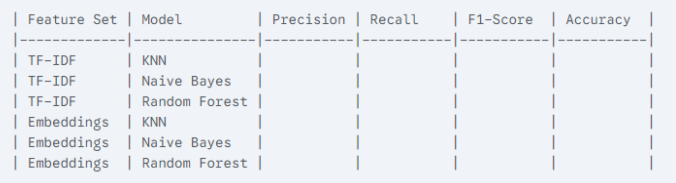
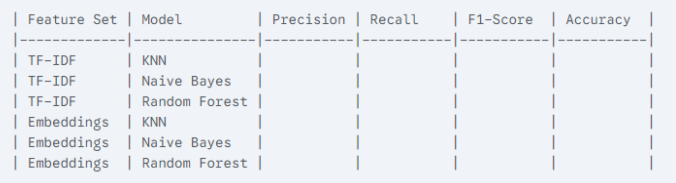


--- Processing category: Books ---


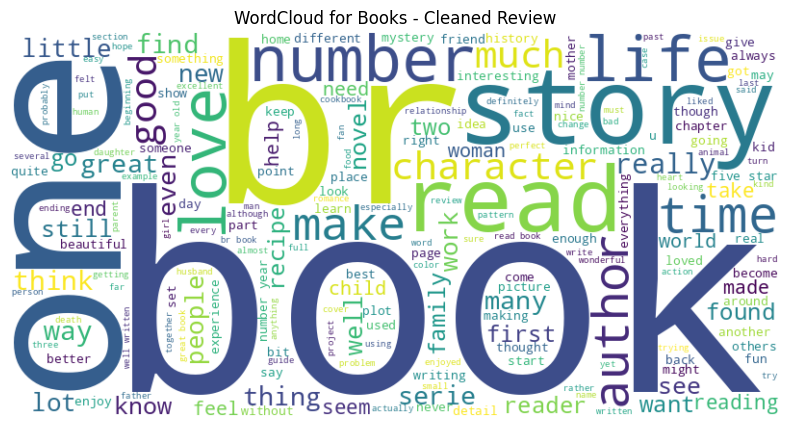

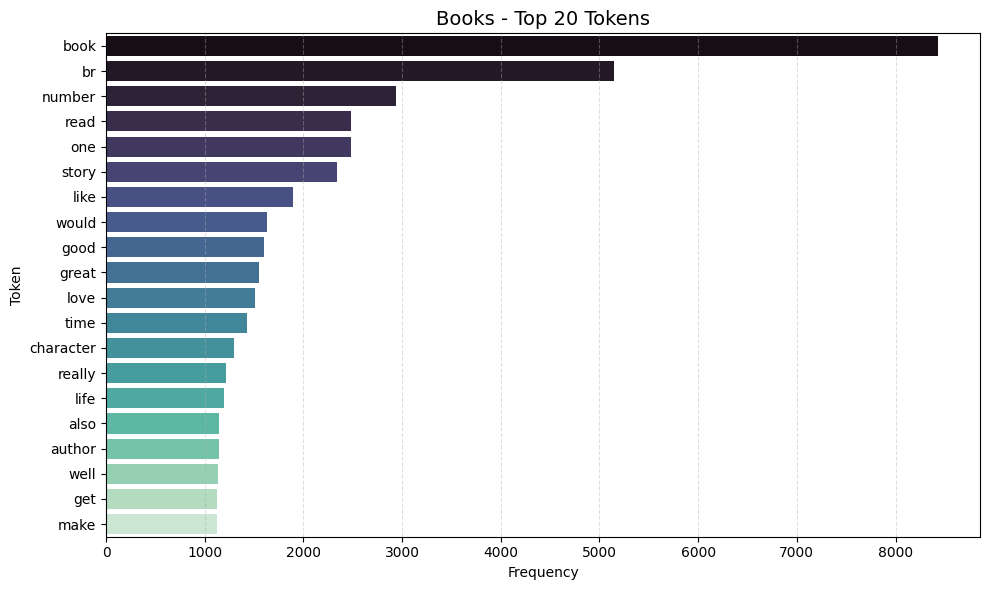

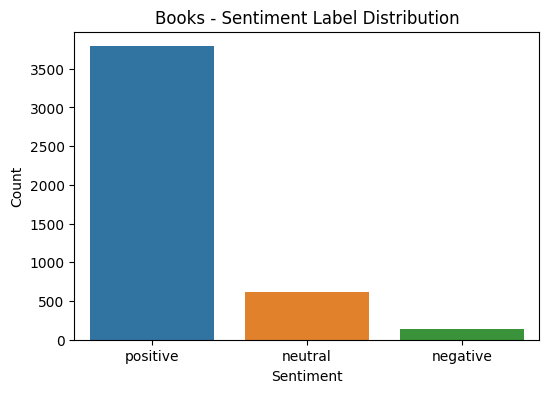

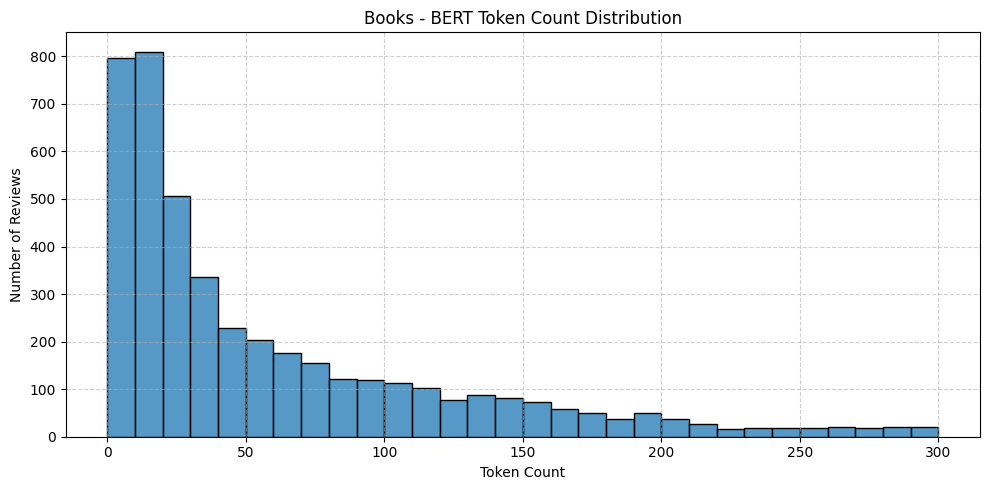


--- Processing category: All_Beauty ---


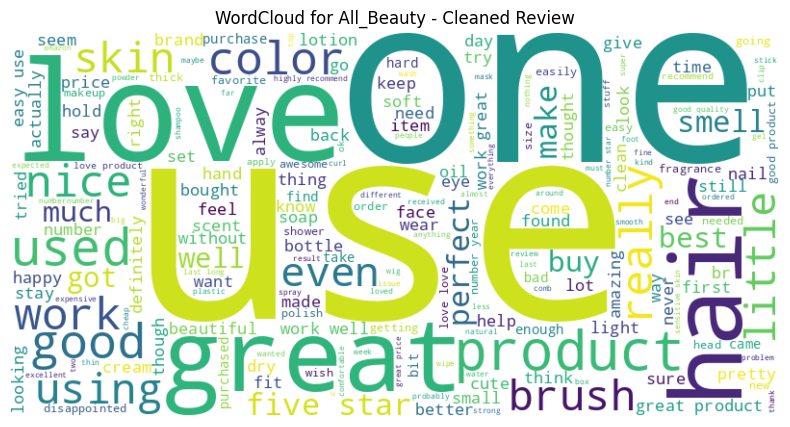

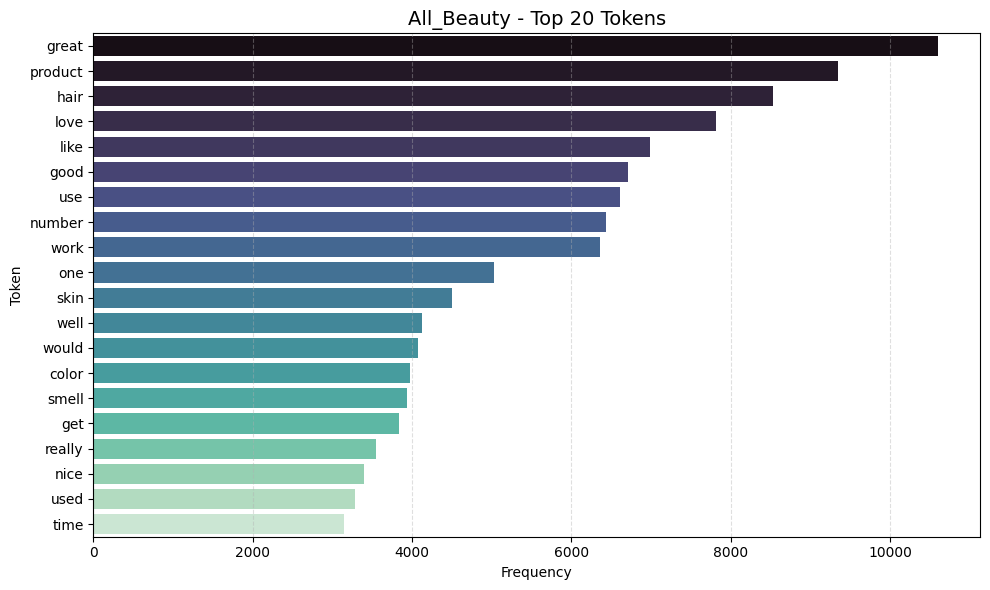

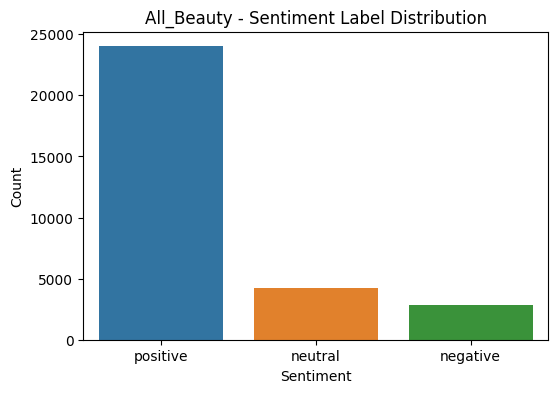

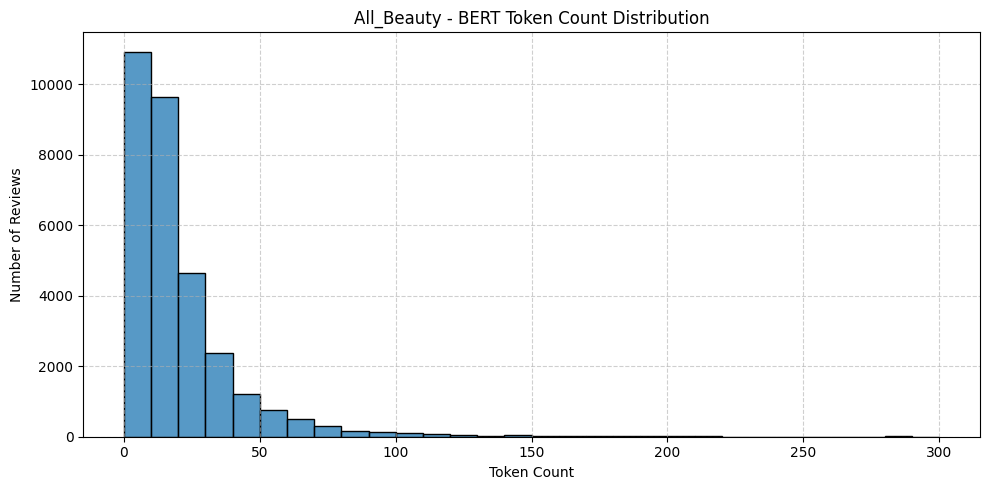


--- Processing category: Electronics ---


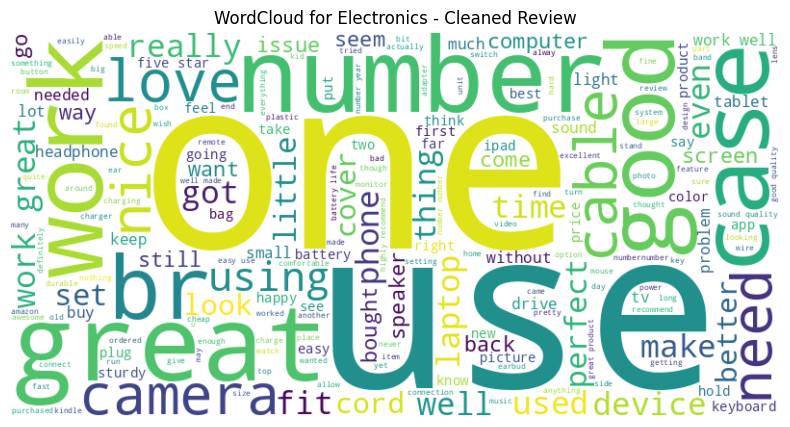

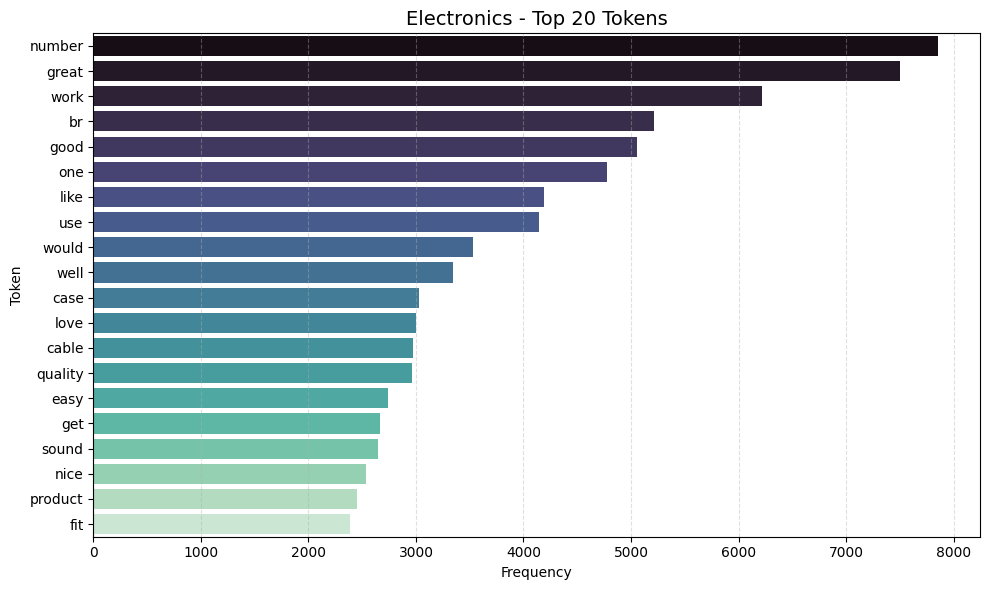

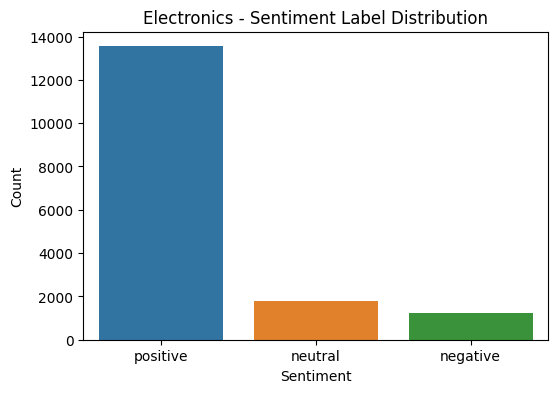

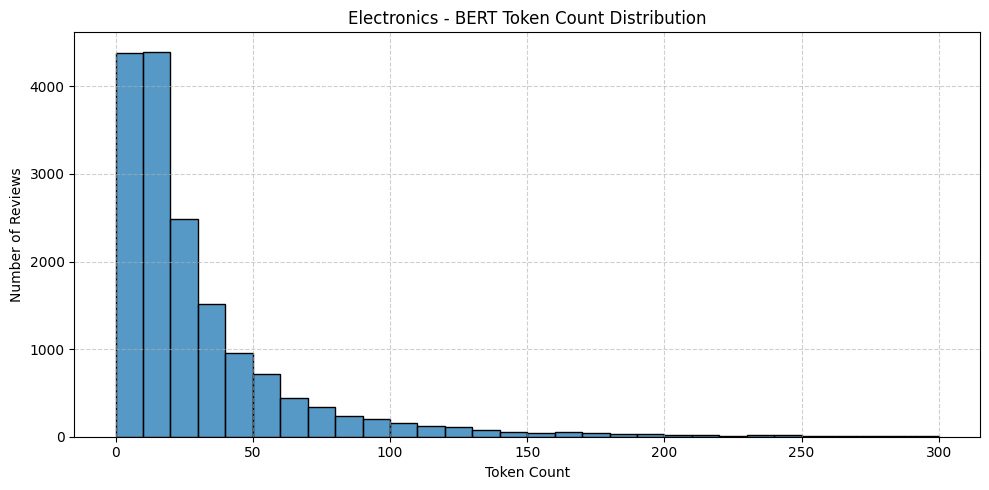


--- Processing category: Movies_and_TV ---


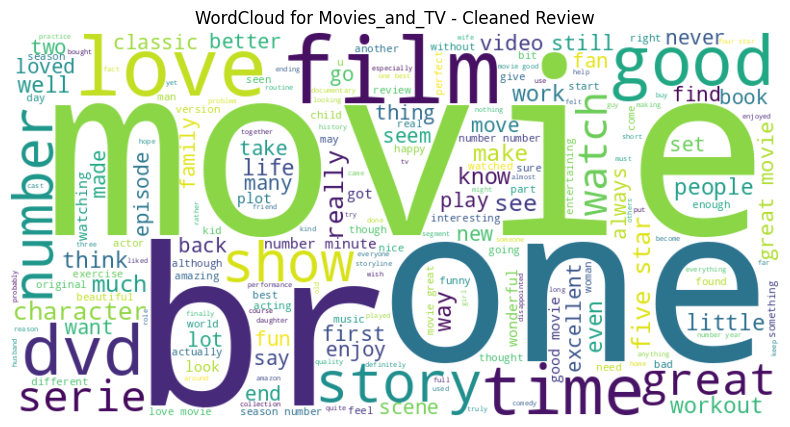

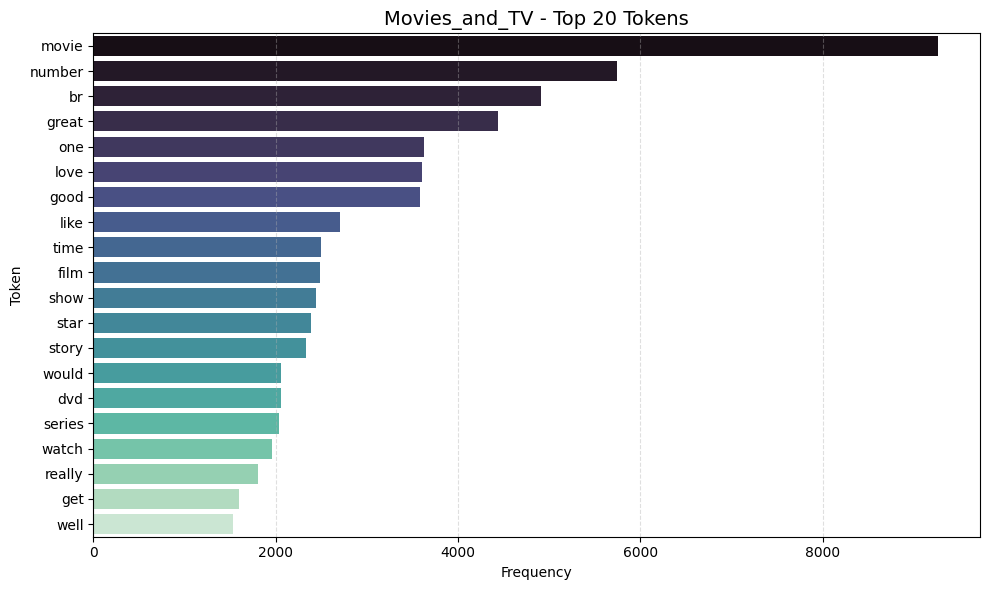

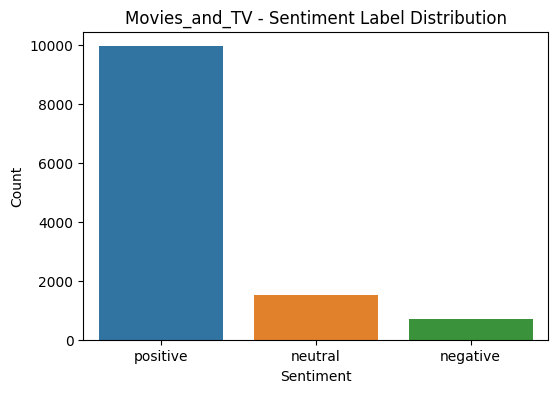

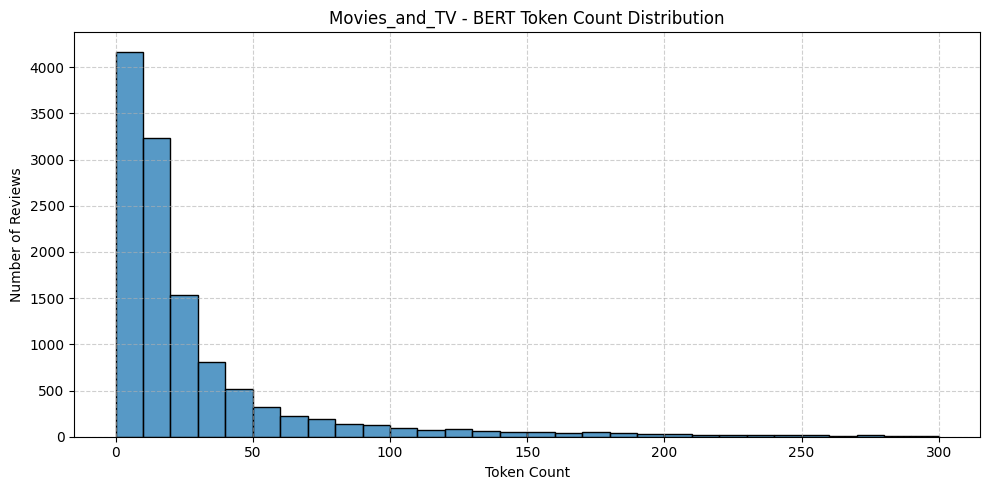


--- Processing category: Sports_and_Outdoors ---


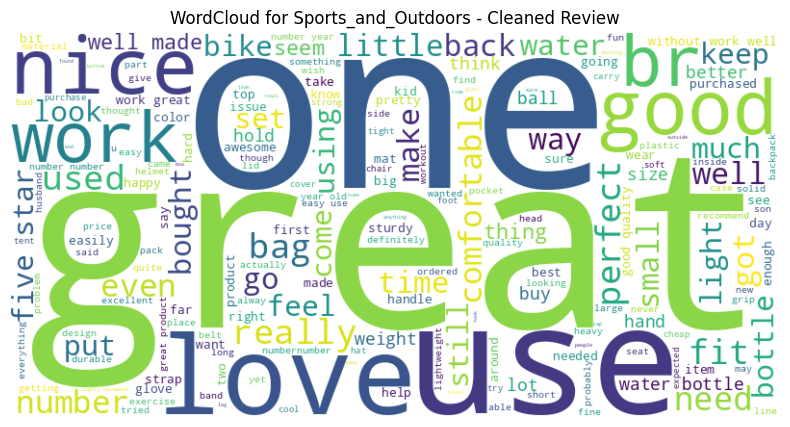

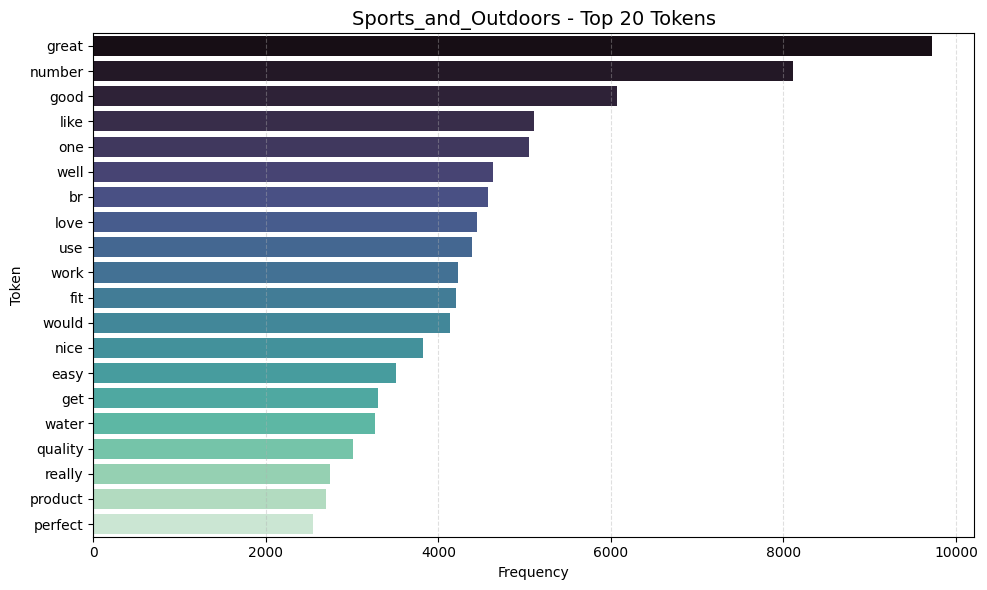

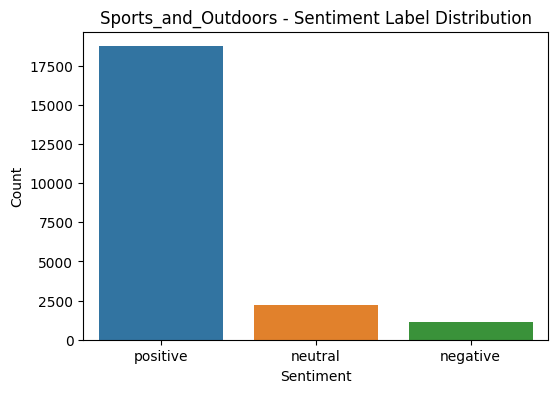

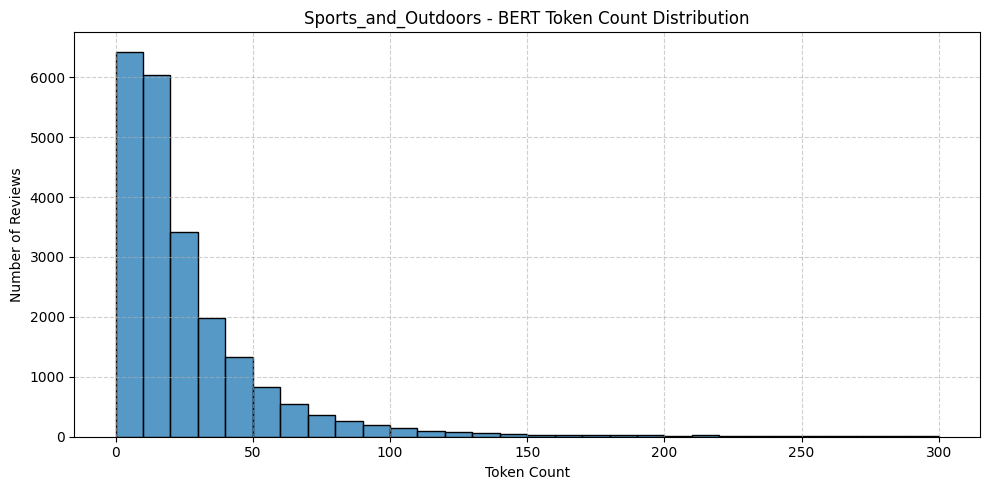

In [15]:
# Store max length of tokens per text for every category
bert_max_lens = {}

for category, _, _ in datasets_info:
    print(f"\n--- Processing category: {category} ---")

    try:
        # Load data
        df = pd.read_csv(f"{category}_cleaned.csv")

        # Convert ratings to sentiment
        def make_sentiment_label(r):
            if r >= 4: return "positive"
            elif r < 2: return "negative"
            else: return "neutral"

        df['sentiment'] = df['rating'].apply(make_sentiment_label)
        df['cleaned_review'] = df['cleaned_title'] + " " + df['cleaned_text']
        df = df[['cleaned_review', 'sentiment']].drop_duplicates()
        df = df.dropna(subset=['cleaned_review'])

        # WordCloud
        def plot_wordcloud(text, title, save_path=None):
            wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(f"WordCloud for {title}")
            if save_path:
                plt.savefig(save_path)
            plt.show()

        plot_wordcloud(df['cleaned_review'], f"{category} - Cleaned Review")

        # Token Frequency
        def get_token_freq(column):
            tokens = [word for text in column.dropna() for word in word_tokenize(text.lower())]
            return Counter(tokens).most_common(20)

        # print("Top tokens in cleaned review:")
        top_tokens = get_token_freq(df['cleaned_review'])

        # Horizontal bar plot 
        tokens, freqs = zip(*top_tokens)
        
        plt.style.use("default")
        plt.figure(figsize=(10, 6))
        sns.barplot(x=list(freqs), y=list(tokens), palette='mako')
        
        plt.title(f"{category} - Top 20 Tokens", fontsize=14)
        plt.xlabel("Frequency")
        plt.ylabel("Token")
        plt.grid(axis='x', linestyle='--', alpha=0.4)
        
        plt.tight_layout()
        plt.show()

        # Sentiment (Label) Distribution
        plt.figure(figsize=(6, 4))
        sns.countplot(data=df, x='sentiment', order=df['sentiment'].value_counts().index)
        plt.title(f"{category} - Sentiment Label Distribution")
        plt.xlabel("Sentiment")
        plt.ylabel("Count")
        plt.show()

        # BERT Token Stats
        token_counts = [len(word_tokenize(text)) for text in df['cleaned_review']]
        mean_tokens = np.mean(token_counts)
        std_tokens = np.std(token_counts)
        variance_tokens = np.var(token_counts)

        suggested_max_len = int(mean_tokens + 2 * std_tokens)
        bert_max_len = min(suggested_max_len, 512)

        bert_max_lens[category] = bert_max_len
        
        max_display_tokens = 300
        filtered_token_counts = [count for count in token_counts if count <= max_display_tokens]
        
        # Plot the histogram
        plt.figure(figsize=(10, 5))
        sns.histplot(filtered_token_counts, bins=range(0, max_display_tokens + 10, 10), kde=False)
        plt.title(f"{category} - BERT Token Count Distribution")
        plt.xlabel("Token Count")
        plt.ylabel("Number of Reviews")
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error processing {category}: {e}")


---

**Answer**

We trained a BERT-based classifier to predict sentiment labels (positive, neutral, negative) from customer reviews.

- We **mapped sentiment labels to integers** and created a custom `SentimentDataset` to tokenize and encode reviews using a Hugging Face tokenizer.

- During training, we used **early stopping based on F1-score** to handle class imbalance and avoid overfitting. The training loop included:
  - Linear learning rate scheduling
  - Validation loss tracking
  - Best model checkpointing based on macro F1

- After training, we evaluated the model on a test set using **macro-averaged precision, recall, F1-score, and accuracy**.

This setup allowed us to build a strong deep learning sentiment model aligned with the project’s classification goals.

In [16]:
# Map the sentiment labels to integers for BERT
label_to_id = {'negative': 0, 'neutral': 1, 'positive': 2}
id_to_label = {v:k for k,v in label_to_id.items()}

# SentimentDataset for BERT
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            truncation=True,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),        # tensor shape [max_len]
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Sets are unbalanced so we should find the best model according to f1 score
def train_bert_model(model, train_loader, val_loader, optimizer, loss_fn, device, epochs=7, patience=1):
    best_f1 = 0
    counter = 0
    train_losses, val_losses = [], []
    # Scheduler for learning rate decay
    num_training_steps = epochs * len(train_loader)
    lr_scheduler = get_scheduler(
        name="linear",
        optimizer=optimizer,
        num_warmup_steps=0,
        num_training_steps=num_training_steps,
    )
    
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for batch in train_loader:
            optimizer.zero_grad()
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids,
                            attention_mask=attention_mask,
                            labels=labels)
            loss = outputs.loss
            loss.backward()
            optimizer.step()
            lr_scheduler.step()
            total_loss += loss.item()
        
        avg_loss = total_loss / len(train_loader)

        val_loss_total = 0
        all_val_preds, all_val_labels = [], []
        model.eval()
        with torch.no_grad():
            for batch in val_loader:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                labels = batch['labels'].to(device)

                outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
                val_loss_total += outputs.loss.item()
                preds = torch.argmax(outputs.logits, dim=1)
                all_val_preds.extend(preds.cpu().numpy())
                all_val_labels.extend(labels.cpu().numpy())

        val_loss = val_loss_total / len(val_loader)
        val_losses.append(val_loss)
        train_losses.append(avg_loss)
        print(f"Epoch {epoch+1}/{epochs}\nTraining Loss: {avg_loss:.4f} - Validation Loss: {val_loss:.4f}")
        precision, recall, f1, _ = precision_recall_fscore_support(all_val_labels, all_val_preds, average='macro')

        print(f"Validation F1 score: {f1:.4f}")

        # Early stopping check
        if f1 > best_f1:
            best_f1 = f1
            counter = 0
            best_model_state = model.state_dict()
        else:
            counter += 1
            if counter >= patience:
                print("Early stopping triggered.")
                break

    # Load best model
    model.load_state_dict(best_model_state)
    return train_losses, val_losses

def evaluate_bert_model(model, dataloader, device):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            
            outputs = model(input_ids=input_ids,
                            attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, dim=1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    precision, recall, f1, _ = precision_recall_fscore_support(
        all_labels, all_preds, average='macro'
    )
    accuracy = accuracy_score(all_labels, all_preds)
    return precision, recall, f1, accuracy


---

**Answer**

We evaluated multiple classification models for sentiment analysis, comparing both traditional machine learning methods and deep learning (BERT) across all product categories. The goal was to classify customer reviews into **positive**, **neutral**, or **negative** classes.

#### Data Preparation

- Each review was labeled based on its rating:
  - `positive` if rating ≥ 4
  - `neutral` if rating is 2 or 3
  - `negative` if rating < 2
- Reviews were preprocessed and tokenized.
- The dataset was **split using stratified sampling** into training (80%) and test (20%) sets to maintain class balance.


#### Feature Extraction

- **TF-IDF**: Top 10,000 terms, filtered by `min_df=10`, `max_df=0.75`
- **Word2Vec**: Pretrained Google News vectors were averaged per review


#### Traditional Models Evaluated

Each of the following models was trained and evaluated using both **TF-IDF** and **Word2Vec** features:
- **Naive Bayes** (`MultinomialNB` for TF-IDF, `GaussianNB` for Word2Vec)
- **KNN** (`KNeighborsClassifier`)
- **Random Forest** (`RandomForestClassifier`)

Two evaluations were performed:
1. **10-Fold Cross-Validation** on the training set (macro-averaged precision, recall, F1-score, accuracy)
2. **Final evaluation on the test set** using the same metrics


#### BERT (Deep Learning Model)

- A pre-trained **BERT (bert-base-uncased)** model was fine-tuned on the same dataset using PyTorch and Hugging Face.
- Early stopping was applied based on **macro F1-score**, with a validation set (10% of train split).
- Reviews were tokenized using the BERT tokenizer and padded to a category-specific `max_len`.
- BERT was **not cross-validated** to avoid overfitting and reduce computational cost.


#### Baseline Comparison

We included a **DummyClassifier** as a naive baseline using the **most frequent class** strategy, helping assess whether learned models outperform random or trivial predictions.

---

To evaluate the performance of our BERT sentiment classifier, we visualized key metrics using three diagnostic plots for each category:

#### 1. Learning Curves

We plotted **training and validation loss** over epochs to monitor the model’s learning behavior. This helps identify issues such as overfitting or underfitting and guides decisions on early stopping.


#### 2. ROC Curve (Multiclass)

Using the model's output logits, we calculated **one-vs-rest ROC curves** for each sentiment class (negative, neutral, positive).  
Each curve includes its **AUC score**, offering insight into the model’s confidence and separability across classes.


#### 3. Confusion Matrix

We visualized the **confusion matrix** to better understand how the model performed on each class. It clearly shows:
- Correct vs. incorrect predictions
- Which classes were most confused
- Class-specific weaknesses (e.g., confusion between neutral and positive)

These plots provide a comprehensive view of the model's effectiveness, both globally (via ROC) and per-class (via confusion matrix).



=== Books category ===

=== 10‑Fold CV on Train Set ===


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4
Training Loss: 0.5499 - Validation Loss: 0.5017
Validation F1 score: 0.3033
Epoch 2/4
Training Loss: 0.4091 - Validation Loss: 0.3777
Validation F1 score: 0.4476
Epoch 3/4
Training Loss: 0.3231 - Validation Loss: 0.3724
Validation F1 score: 0.4690
Epoch 4/4
Training Loss: 0.2609 - Validation Loss: 0.3734
Validation F1 score: 0.4734

=== Final Test Set Evaluation ===


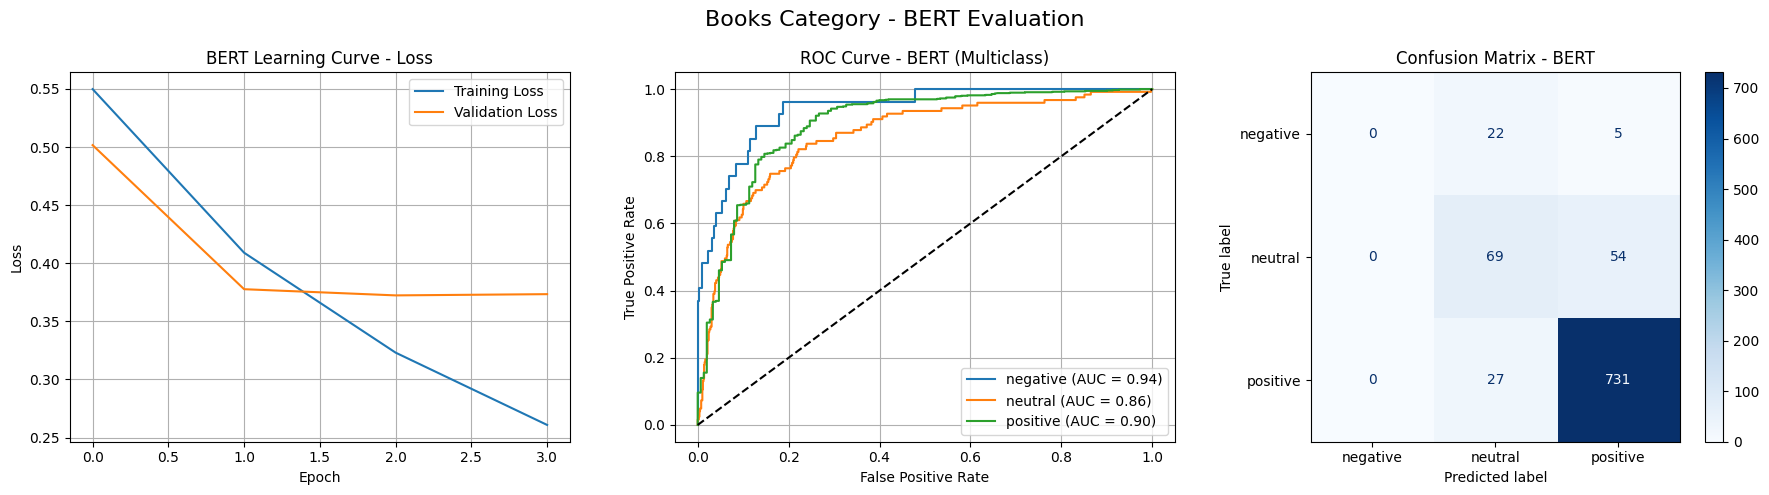


=== All_Beauty category ===

=== 10‑Fold CV on Train Set ===


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4
Training Loss: 0.4438 - Validation Loss: 0.3733
Validation F1 score: 0.6595
Epoch 2/4
Training Loss: 0.3196 - Validation Loss: 0.3622
Validation F1 score: 0.6924
Epoch 3/4
Training Loss: 0.2489 - Validation Loss: 0.3806
Validation F1 score: 0.7051
Epoch 4/4
Training Loss: 0.1980 - Validation Loss: 0.4060
Validation F1 score: 0.7152

=== Final Test Set Evaluation ===


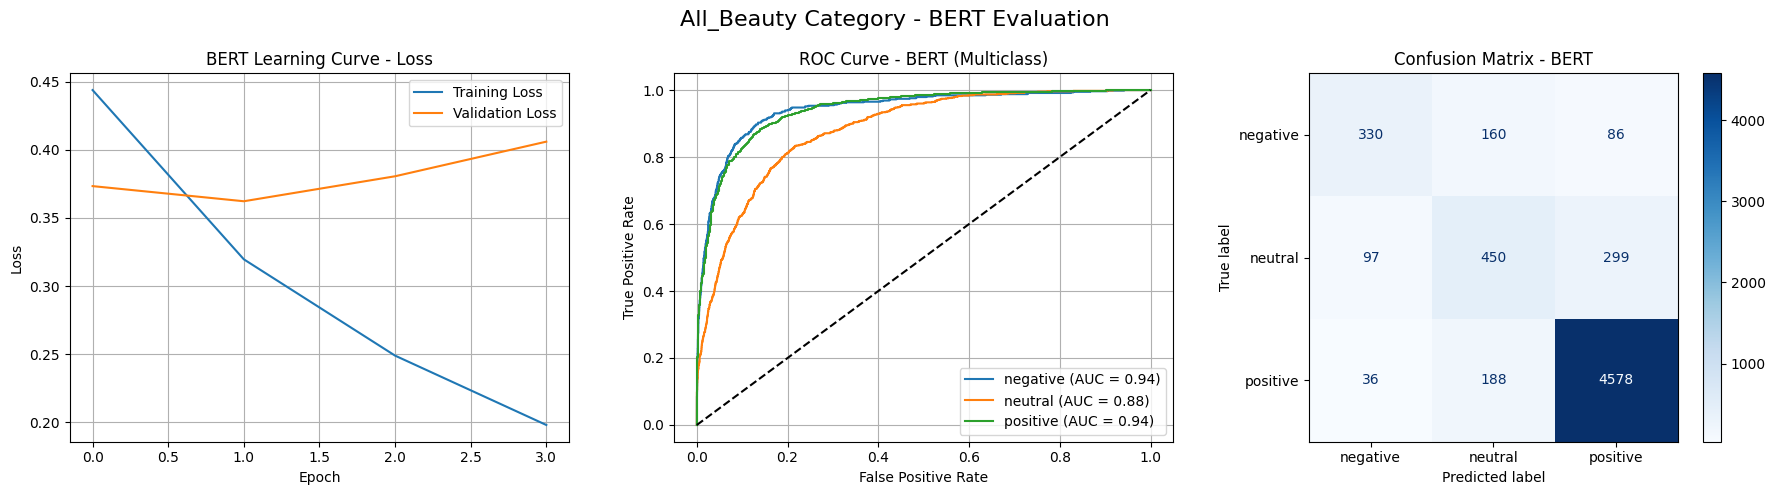


=== Electronics category ===

=== 10‑Fold CV on Train Set ===


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4
Training Loss: 0.4250 - Validation Loss: 0.3602
Validation F1 score: 0.6166
Epoch 2/4
Training Loss: 0.2919 - Validation Loss: 0.3784
Validation F1 score: 0.6346
Epoch 3/4
Training Loss: 0.2228 - Validation Loss: 0.3724
Validation F1 score: 0.6567
Epoch 4/4
Training Loss: 0.1727 - Validation Loss: 0.4087
Validation F1 score: 0.6701

=== Final Test Set Evaluation ===


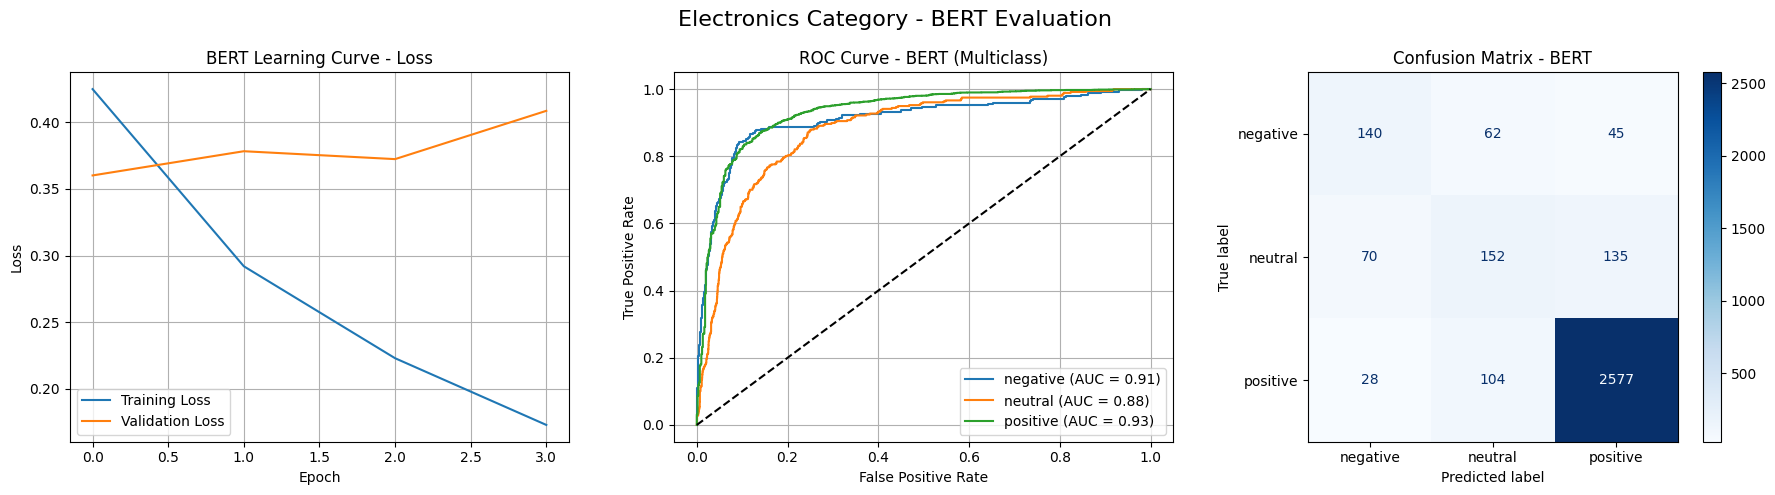


=== Movies_and_TV category ===

=== 10‑Fold CV on Train Set ===


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4
Training Loss: 0.4463 - Validation Loss: 0.2849
Validation F1 score: 0.7566
Epoch 2/4
Training Loss: 0.2889 - Validation Loss: 0.2482
Validation F1 score: 0.7832
Epoch 3/4
Training Loss: 0.2149 - Validation Loss: 0.2589
Validation F1 score: 0.7743
Early stopping triggered.

=== Final Test Set Evaluation ===


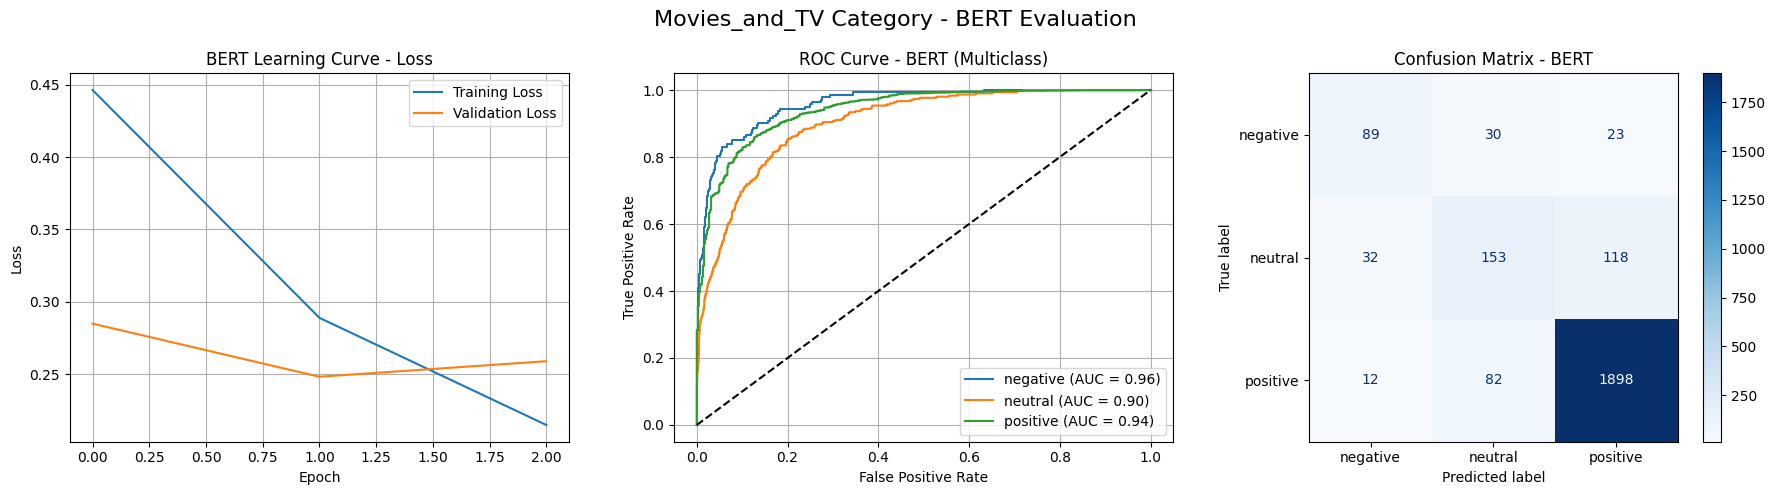


=== Sports_and_Outdoors category ===

=== 10‑Fold CV on Train Set ===


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4
Training Loss: 0.3655 - Validation Loss: 0.3012
Validation F1 score: 0.6172
Epoch 2/4
Training Loss: 0.2499 - Validation Loss: 0.2866
Validation F1 score: 0.6636
Epoch 3/4
Training Loss: 0.1868 - Validation Loss: 0.3039
Validation F1 score: 0.6521
Early stopping triggered.

=== Final Test Set Evaluation ===


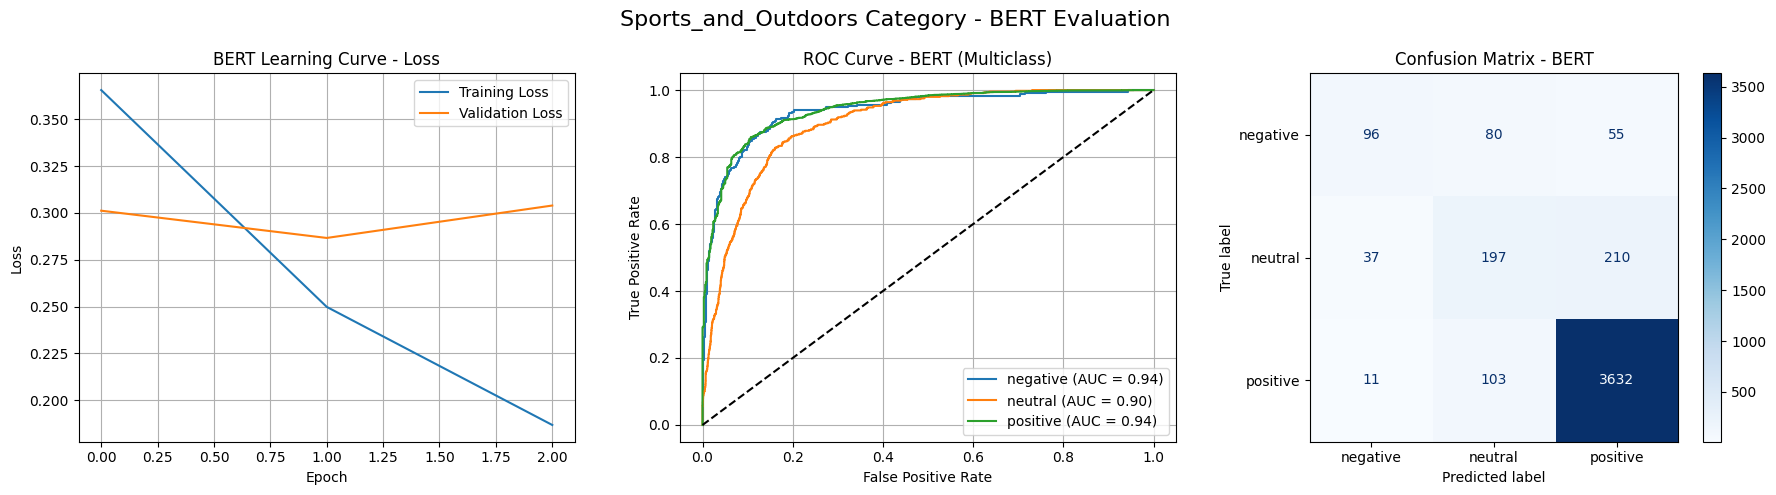

In [17]:
for category, _, _ in datasets_info:

    print(f"\n=== {category} category ===")

    # Load data
    df = pd.read_csv(f"{category}_cleaned.csv")

    # Convert ratings to sentiment
    def make_sentiment_label(r):
        if r >= 4: return "positive"
        elif r < 2: return "negative"
        else: return "neutral"

    # Get cleaned review (X) data and sentiment label (y)
    df['sentiment'] = df['rating'].apply(make_sentiment_label)
    df['cleaned_review'] = df['cleaned_title'] + " " + df['cleaned_text']
    df = df[['cleaned_review', 'sentiment']].drop_duplicates()
    df = df.dropna(subset=['cleaned_review'])

    # split the data we have ensuring similar distribution between train and test datasets
    train_df, test_df = train_test_split(
        df,
        test_size=0.2,
        stratify=df['sentiment'],
        random_state=42
    )

    # TF-IDF: Keep up to the 10,000 most frequent terms, excluding English stopwords,
    # and ignoring terms that appear in fewer than 10 documents or in more than 75% of documents.
    tfidf = TfidfVectorizer(max_features=10000, stop_words='english', min_df=10, max_df=0.75)
    tfidf_train = tfidf.fit_transform(train_df['cleaned_review'])
    tfidf_test  = tfidf.transform(test_df['cleaned_review'])
    
    w2v_train = np.vstack(train_df['cleaned_review'].apply(lambda t: vectorize_text(t, word2vec_model)).values)
    w2v_test  = np.vstack(test_df['cleaned_review'].apply(lambda t: vectorize_text(t, word2vec_model)).values)

    models = {
        ('NB', 'TFIDF'): MultinomialNB(),  # Use MultinomialNB only with TFIDF
        ('NB', 'W2V'): GaussianNB(),       # Use GaussianNB only with W2V
        ('KNN', 'TFIDF'): KNeighborsClassifier(n_neighbors=5),
        ('KNN', 'W2V'): KNeighborsClassifier(n_neighbors=5),
        ('RF', 'TFIDF'): RandomForestClassifier(n_estimators=100, random_state=42),
        ('RF', 'W2V'): RandomForestClassifier(n_estimators=100, random_state=42),
    }

    # 10 fold cross validation
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # metrics
    scoring = ['precision_macro', 'recall_macro', 'f1_macro', 'accuracy']
    
    feature_sets_train = {'TFIDF': tfidf_train, 'W2V': w2v_train}
    feature_sets_test  = {'TFIDF': tfidf_test,  'W2V': w2v_test}

    # ------- MATRIX 1: 10-Fold CV on TRAIN SET -------
    results = {}
    for (name, feat_name), clf in models.items():
        # Apply cross validation in each of the defined models
        X = feature_sets_train[feat_name]
        if isinstance(clf, GaussianNB) and hasattr(X, "toarray"):
            X = X.toarray()
        cv_res = cross_validate(clf, X, train_df['sentiment'],
                                cv=cv, scoring=scoring)
        results[(name, feat_name)] = { m: np.mean(cv_res[f'test_{m}'])
                                       for m in scoring }
    
    cv_df = pd.DataFrame.from_dict(results, orient='index')
    cv_df.index = pd.MultiIndex.from_tuples(cv_df.index,
                                            names=['Model','Features'])
    cv_df_flat = cv_df.reset_index()[['Model','Features',
                                      'precision_macro','recall_macro','f1_macro','accuracy']]
    print("\n=== 10‑Fold CV on Train Set ===")
    display(cv_df_flat.style.hide(axis='index'))

    # ------- MATRIX 1: 10-Fold CV on TRAIN SET -------
    test_results = {}
    for (name, feat_name), clf in models.items():
        # Evaluate each defined model in test set
        X_train = feature_sets_train[feat_name]
        X_test  = feature_sets_test[feat_name]
        if isinstance(clf, GaussianNB) and hasattr(X_train, "toarray"):
            X_train = X_train.toarray()
            X_test  = X_test.toarray()
        clf.fit(X_train, train_df['sentiment'])
        preds = clf.predict(X_test)
        p, r, f1, _ = precision_recall_fscore_support(
            test_df['sentiment'], preds, average='macro'
        )
        acc = accuracy_score(test_df['sentiment'], preds)
        test_results[(name, feat_name)] = {
            'precision_macro': p,
            'recall_macro':    r,
            'f1_macro':        f1,
            'accuracy':        acc
        }
    
    test_df_results = pd.DataFrame.from_dict(test_results, orient='index')
    test_df_results.index = pd.MultiIndex.from_tuples(
        test_df_results.index, names=['Model','Features']
    )
    test_df_results = test_df_results.reset_index()

    # ------ BERT MODEL | Train & Test ------
    # In BERT transformer we so not do cross validation because it does not need a lot of epochs to get trained and it gets easily overfitted
    
    # Bert pretrained tokenizer
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    
    # Bert transformer model
    model = BertForSequenceClassification.from_pretrained(
        'bert-base-uncased', 
        num_labels=3  # negative | neutral | positive
    )
    
    # For BERT we do not use cross validation, but we split the train_df into train and validation
    # to perform hold-out method. Train on test set and validate on validation set keeping the
    # model which suits best for us. In this situation the datasets are unbalanced so we want to
    # balance the precision with the recall which means we use f1 score
    bert_train_df, val_df = train_test_split(
        train_df,
        test_size=0.1,
        stratify=train_df['sentiment'],
        random_state=42
    )
    
    # Create datasets
    train_dataset = SentimentDataset(bert_train_df['cleaned_review'].values, bert_train_df['sentiment'].map(label_to_id).values, tokenizer, bert_max_lens[category])
    val_dataset   = SentimentDataset(val_df['cleaned_review'].values, val_df['sentiment'].map(label_to_id).values, tokenizer, bert_max_lens[category])
    test_dataset  = SentimentDataset(test_df['cleaned_review'].values, test_df['sentiment'].map(label_to_id).values, tokenizer, bert_max_lens[category])
    
    # Create dataloaders
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    val_loader   = DataLoader(val_dataset, batch_size=32)
    test_loader  = DataLoader(test_dataset, batch_size=32)


    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    optimizer = AdamW(model.parameters(), lr=1e-5,weight_decay=0.01)
    loss_fn = torch.nn.CrossEntropyLoss()

    # Train
    train_losses, val_losses = train_bert_model(model, train_loader, val_loader, optimizer, loss_fn, device, epochs=4, patience=1)
    
    # Evaluate
    precision, recall, f1, accuracy = evaluate_bert_model(model, test_loader, device)
    
    # Create a DataFrame for BERT results
    bert_df = pd.DataFrame({
        'Model': ['BERT'],
        'Features': [''],
        'precision_macro': [precision],
        'recall_macro': [recall],
        'f1_macro': [f1],
        'accuracy': [accuracy]
    })


    # -- We need to compare our results with a baseline model so we use dummy classifier from sklearn
    
    # Define dummy classifier
    dummy = DummyClassifier(strategy='most_frequent')  # or use 'stratified'
    dummy.fit(train_df['cleaned_review'].values.reshape(-1, 1), train_df['sentiment'])  # dummy needs fit
    
    # Predict on test set (dummy doesn't use features, so pass dummy inputs)
    dummy_preds = dummy.predict(test_df['cleaned_review'].values.reshape(-1, 1))
    
    # Evaluate dummy
    p, r, f1, _ = precision_recall_fscore_support(test_df['sentiment'], dummy_preds, average='macro')
    acc = accuracy_score(test_df['sentiment'], dummy_preds)
    
    # Append to test results
    baseline_df = pd.DataFrame({
        'Model': ['Baseline'],
        'Features': [''],
        'precision_macro': [p],
        'recall_macro': [r],
        'f1_macro': [f1],
        'accuracy': [acc]
    })
    
    # Combine all results
    final_test_results_df = pd.concat([test_df_results, bert_df, baseline_df], ignore_index=True)
    print("\n=== Final Test Set Evaluation ===")
    display(final_test_results_df.style.hide(axis='index'))

    # split here

    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'{category} Category - BERT Evaluation', fontsize=16)

    
    # Subplot 1: Loss Curves
    axs[0].plot(train_losses, label='Training Loss')
    axs[0].plot(val_losses, label='Validation Loss')
    axs[0].set_xlabel("Epoch")
    axs[0].set_ylabel("Loss")
    axs[0].set_title("BERT Learning Curve - Loss")
    axs[0].legend()
    axs[0].grid(True)
    
    # Collect raw logits for ROC
    model.eval()
    all_logits, all_labels = [], []
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].cpu().numpy()
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits.cpu().numpy()
    
            all_logits.append(logits)
            all_labels.extend(labels)
    
    y_score = np.vstack(all_logits)
    y_true = np.array(all_labels)
    y_true_bin = label_binarize(y_true, classes=[0, 1, 2])  # 3-class
    
    # Subplot 2: ROC Curve
    for i, label_name in id_to_label.items():
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        axs[1].plot(fpr, tpr, label=f'{label_name} (AUC = {roc_auc:.2f})')
    
    axs[1].plot([0, 1], [0, 1], 'k--')
    axs[1].set_xlabel('False Positive Rate')
    axs[1].set_ylabel('True Positive Rate')
    axs[1].set_title('ROC Curve - BERT (Multiclass)')
    axs[1].legend()
    axs[1].grid(True)
    
    # Subplot 3: Confusion Matrix
    y_pred = np.argmax(y_score, axis=1)
    labels = ['negative', 'neutral', 'positive']
    
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(ax=axs[2], cmap=plt.cm.Blues, values_format='d')
    axs[2].set_title("Confusion Matrix - BERT")
    axs[2].grid(False)
    
    plt.tight_layout()
    plt.show()